In [69]:
  # Import libraries
import numpy as np
import pandas as pd
import scipy as sc
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable
from matplotlib.colors import Normalize
from matplotlib import cm


# Load datasets for discrimination, difficulties bnd abilites

In [2]:
# Discriminations
a_10_all = pd.read_csv('output_data/10_missing/a/a_transformer_10_missing_ALL_CNTS.csv', sep=';', header=None)
a_25_all = pd.read_csv('output_data/25_missing/a/a_transformer_25_missing_ALL_CNTS.csv', sep=';', header=None)
a_50_all = pd.read_csv('output_data/50_missing/a/a_transformer_50_missing_ALL_CNTS.csv', sep=';', header=None)

a_10_ds = pd.read_csv('output_data/10_missing/downstream/a_transformer_10_missing_ALL_CNTS.csv', sep=';', header=None)
a_25_ds = pd.read_csv('output_data/25_missing/downstream/a_transformer_25_missing_ALL_CNTS.csv', sep=';', header=None)
a_50_ds = pd.read_csv('output_data/50_missing/downstream/a_transformer_50_missing_ALL_CNTS.csv', sep=';', header=None)

a_10_all_jml = pd.read_csv('output_data_jml/10_missing/a/discr_hat_jml_10_missing_ALL_CNTS_2.csv', sep=';', header=None)
a_25_all_jml = pd.read_csv('output_data_jml/25_missing/a/discr_hat_jml_25_missing_ALL_CNTS_2.csv', sep=';', header=None)
a_50_all_jml = pd.read_csv('output_data_jml/50_missing/a/discr_hat_jml_50_missing_ALL_CNTS_2.csv', sep=';', header=None)

a_ds_jml = pd.read_csv('output_data_jml/discr_hat_jml_downstream_ALL_CNTS_2.csv', sep=';', header=None)

a_10_all_jml = a_10_all_jml.values[a_10_all_jml != 0]
a_25_all_jml = a_25_all_jml.values[a_25_all_jml != 0]
a_50_all_jml = a_50_all_jml.values[a_50_all_jml != 0]
a_ds_jml = a_ds_jml.values[a_ds_jml != 0]

# Difficulties
b_10_all = pd.read_csv('output_data/10_missing/b/b_transformer_10_missing_ALL_CNTS.csv', sep=';', header=None)
b_25_all = pd.read_csv('output_data/25_missing/b/b_transformer_25_missing_ALL_CNTS.csv', sep=';', header=None)
b_50_all = pd.read_csv('output_data/50_missing/b/b_transformer_50_missing_ALL_CNTS.csv', sep=';', header=None)

b_10_ds = pd.read_csv('output_data/10_missing/downstream/b_transformer_10_missing_ALL_CNTS.csv', sep=';', header=None)
b_25_ds = pd.read_csv('output_data/25_missing/downstream/b_transformer_25_missing_ALL_CNTS.csv', sep=';', header=None)
b_50_ds = pd.read_csv('output_data/50_missing/downstream/b_transformer_50_missing_ALL_CNTS.csv', sep=';', header=None)

b_10_all_jml = pd.read_csv('output_data_jml/10_missing/b/diff_hat_jml_10_missing_ALL_CNTS_2.csv', sep=';', header=None)
b_25_all_jml = pd.read_csv('output_data_jml/25_missing/b/diff_hat_jml_25_missing_ALL_CNTS_2.csv', sep=';', header=None)
b_50_all_jml = pd.read_csv('output_data_jml/50_missing/b/diff_hat_jml_50_missing_ALL_CNTS_2.csv', sep=';', header=None)

b_ds_jml = pd.read_csv('output_data_jml/diff_hat_jml_downstream_ALL_CNTS_2.csv', sep=';', header=None)

# Abilities
theta_10_all = pd.read_csv('output_data/10_missing/thetas/thetas_transformer_10_missing_ALL_CNTS.csv', sep=';', header=0)
theta_25_all = pd.read_csv('output_data/25_missing/thetas/thetas_transformer_25_missing_ALL_CNTS.csv', sep=';', header=0)
theta_50_all = pd.read_csv('output_data/50_missing/thetas/thetas_transformer_50_missing_ALL_CNTS.csv', sep=';', header=0)

theta_10_ds = pd.read_csv('output_data/10_missing/downstream/thetas_transformer_10_missing_ALL_CNTS.csv', sep=';', header=0)
theta_25_ds = pd.read_csv('output_data/25_missing/downstream/thetas_transformer_25_missing_ALL_CNTS.csv', sep=';', header=0)
theta_50_ds = pd.read_csv('output_data/50_missing/downstream/thetas_transformer_50_missing_ALL_CNTS.csv', sep=';', header=0)

theta_10_all_jml = pd.read_csv('output_data_jml/10_missing/thetas/thetas_jml_10_missing_ALL_CNTS_2.csv', sep=';', header=None)
theta_25_all_jml = pd.read_csv('output_data_jml/25_missing/thetas/thetas_jml_25_missing_ALL_CNTS_2.csv', sep=';', header=None)
theta_50_all_jml = pd.read_csv('output_data_jml/50_missing/thetas/thetas_jml_50_missing_ALL_CNTS_2.csv', sep=';', header=None)

theta_ds_jml = pd.read_csv('output_data_jml/thetas_jml_downstream_ALL_CNTS_2.csv', sep=';', header=None)

test_cnt = pd.read_csv('../input_data/test_cnt.csv', sep=';', header=0)
downstream_cnt = pd.read_csv('../input_data/downstream_cnt.csv', sep=';', header=0)


In [3]:
print(a_10_all.shape)
print(a_10_all_jml.shape)

(18, 1)
(18,)


# Scatter plot JML x VAEQ

## Discrimination of masked test dataset

Text(0.5, 1.0, '50% missing values')

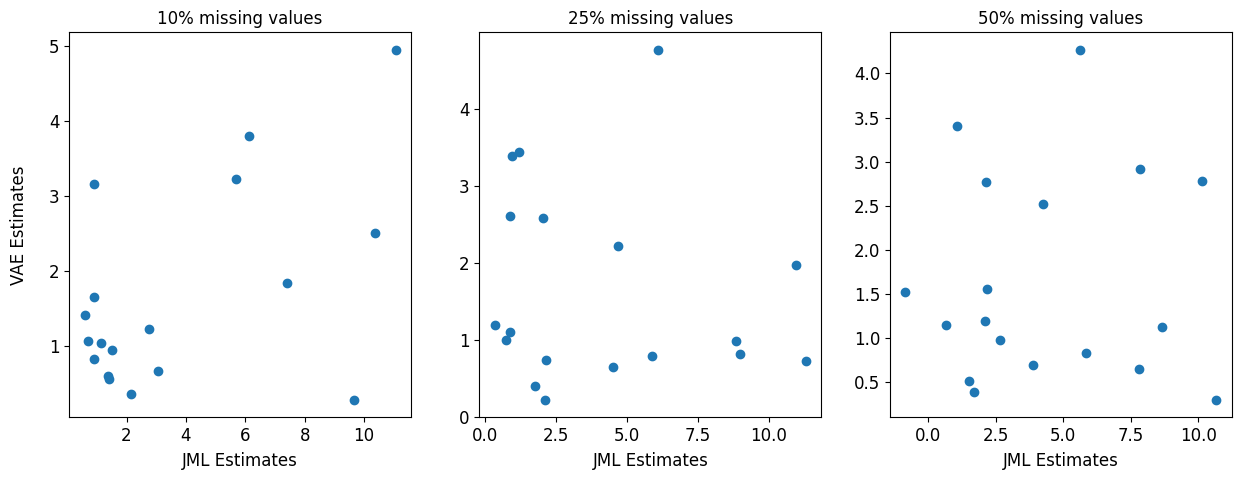

In [107]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0].scatter(a_10_all_jml, a_10_all)
axs[0].tick_params(axis='x', labelsize=labelsize)
axs[0].tick_params(axis='y', labelsize=labelsize)
axs[0].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[1].scatter(a_25_all_jml, a_25_all)
axs[1].tick_params(axis='x', labelsize=labelsize)
axs[1].tick_params(axis='y', labelsize=labelsize)
axs[1].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[2].scatter(a_50_all_jml, a_50_all)
axs[2].tick_params(axis='x', labelsize=labelsize)
axs[2].tick_params(axis='y', labelsize=labelsize)
axs[2].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0].set_ylabel('VAE Estimates', **label_fmt)

axs[0].set_title('10% missing values')
axs[1].set_title('25% missing values')
axs[2].set_title('50% missing values')



## Discrimination o real missing dataset

Text(0.5, 1.0, '50% missing values')

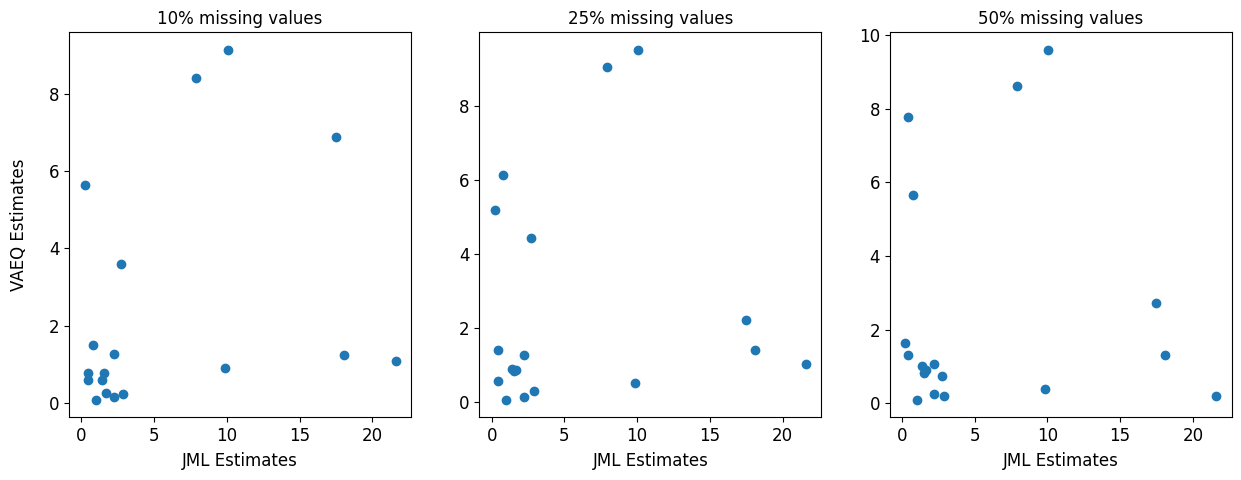

In [108]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0].scatter(a_ds_jml, a_10_ds)
axs[0].tick_params(axis='x', labelsize=labelsize)
axs[0].tick_params(axis='y', labelsize=labelsize)
axs[0].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[1].scatter(a_ds_jml, a_25_ds)
axs[1].tick_params(axis='x', labelsize=labelsize)
axs[1].tick_params(axis='y', labelsize=labelsize)
axs[1].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[2].scatter(a_ds_jml, a_50_ds)
axs[2].tick_params(axis='x', labelsize=labelsize)
axs[2].tick_params(axis='y', labelsize=labelsize)
axs[2].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0].set_ylabel('VAEQ Estimates', **label_fmt)

axs[0].set_title('10% missing values')
axs[1].set_title('25% missing values')
axs[2].set_title('50% missing values')



## Difficulty of masked test dataset

Text(0.5, 1.0, '50% missing values')

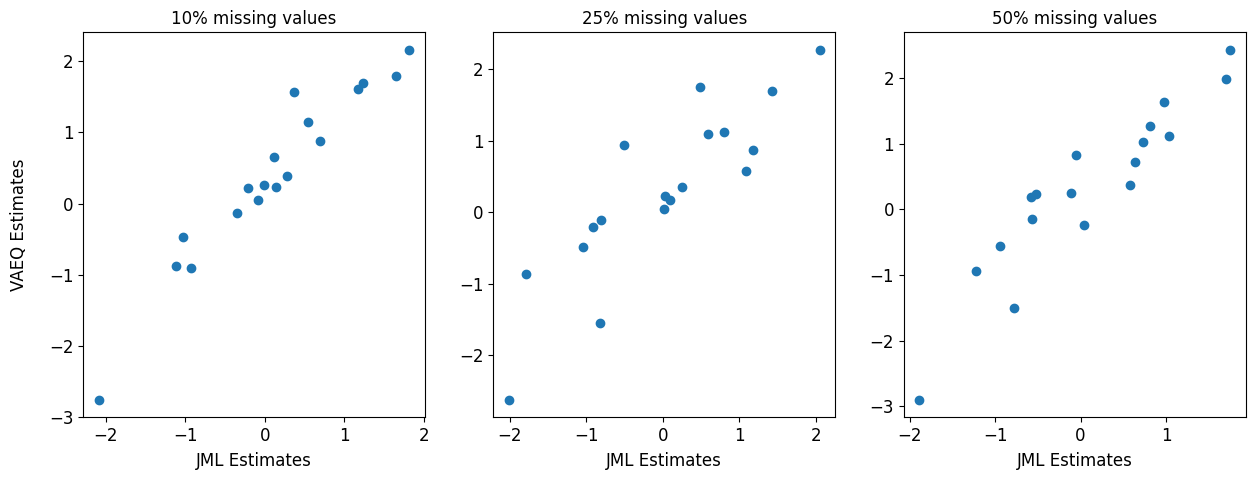

In [109]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0].scatter(b_10_all_jml, b_10_all)
axs[0].tick_params(axis='x', labelsize=labelsize)
axs[0].tick_params(axis='y', labelsize=labelsize)
axs[0].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[1].scatter(b_25_all_jml, b_25_all)
axs[1].tick_params(axis='x', labelsize=labelsize)
axs[1].tick_params(axis='y', labelsize=labelsize)
axs[1].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[2].scatter(b_50_all_jml, b_50_all)
axs[2].tick_params(axis='x', labelsize=labelsize)
axs[2].tick_params(axis='y', labelsize=labelsize)
axs[2].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0].set_ylabel('VAEQ Estimates', **label_fmt)

axs[0].set_title('10% missing values')
axs[1].set_title('25% missing values')
axs[2].set_title('50% missing values')



## Discrimination of real missing dataset

Text(0.5, 1.0, '50% missing values')

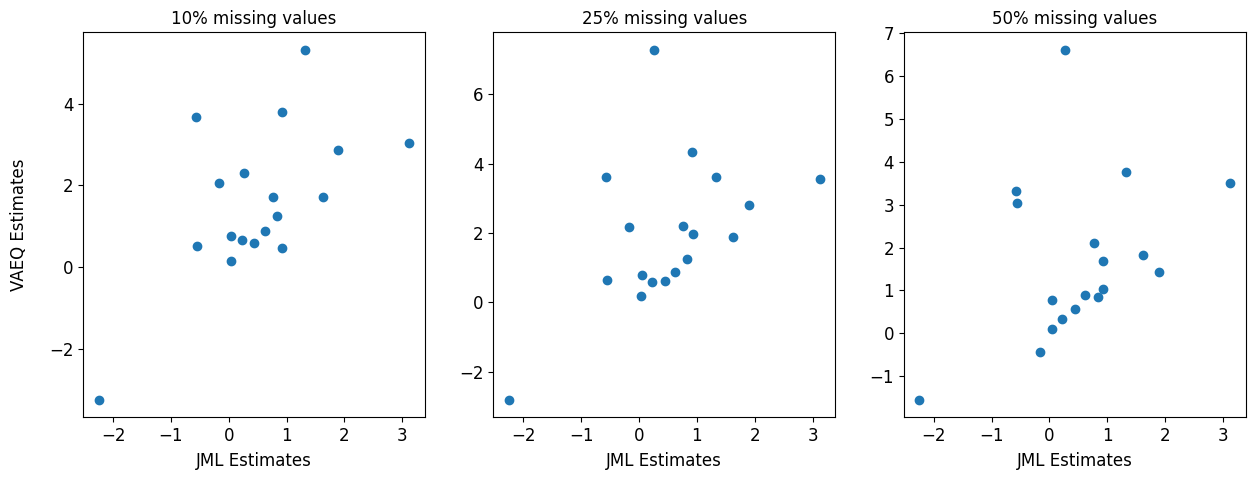

In [110]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0].scatter(b_ds_jml, b_10_ds)
axs[0].tick_params(axis='x', labelsize=labelsize)
axs[0].tick_params(axis='y', labelsize=labelsize)
axs[0].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[1].scatter(b_ds_jml, b_25_ds)
axs[1].tick_params(axis='x', labelsize=labelsize)
axs[1].tick_params(axis='y', labelsize=labelsize)
axs[1].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[2].scatter(b_ds_jml, b_50_ds)
axs[2].tick_params(axis='x', labelsize=labelsize)
axs[2].tick_params(axis='y', labelsize=labelsize)
axs[2].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0].set_ylabel('VAEQ Estimates', **label_fmt)

axs[0].set_title('10% missing values')
axs[1].set_title('25% missing values')
axs[2].set_title('50% missing values')



In [8]:
print(theta_10_all['Thetas Estimation'].shape)
print(theta_10_all_jml.values.transpose().flatten().shape)

(860,)
(860,)


## Thetas of masked test dataset

Text(0.5, 1.0, '50% missing values')

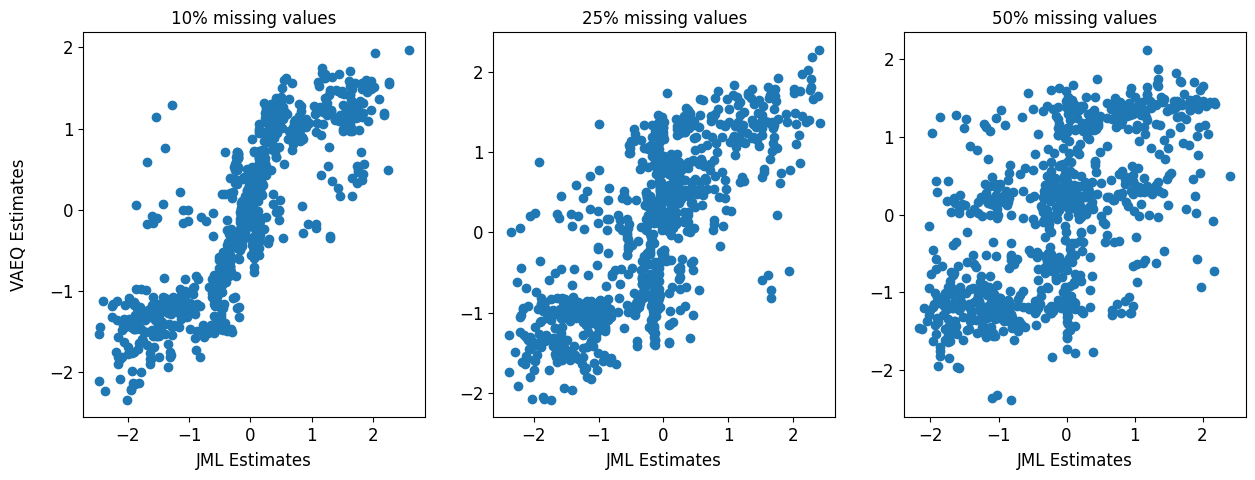

In [111]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0].scatter(theta_10_all_jml.values.transpose().flatten(), theta_10_all['Thetas Estimation'])
axs[0].tick_params(axis='x', labelsize=labelsize)
axs[0].tick_params(axis='y', labelsize=labelsize)
axs[0].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[1].scatter(theta_25_all_jml.values.transpose().flatten(), theta_25_all['Thetas Estimation'])
axs[1].tick_params(axis='x', labelsize=labelsize)
axs[1].tick_params(axis='y', labelsize=labelsize)
axs[1].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[2].scatter(theta_50_all_jml.values.transpose().flatten(), theta_50_all['Thetas Estimation'])
axs[2].tick_params(axis='x', labelsize=labelsize)
axs[2].tick_params(axis='y', labelsize=labelsize)
axs[2].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0].set_ylabel('VAEQ Estimates', **label_fmt)

axs[0].set_title('10% missing values')
axs[1].set_title('25% missing values')
axs[2].set_title('50% missing values')

Text(0.02, 0.5, 'VAEQ Estimates')

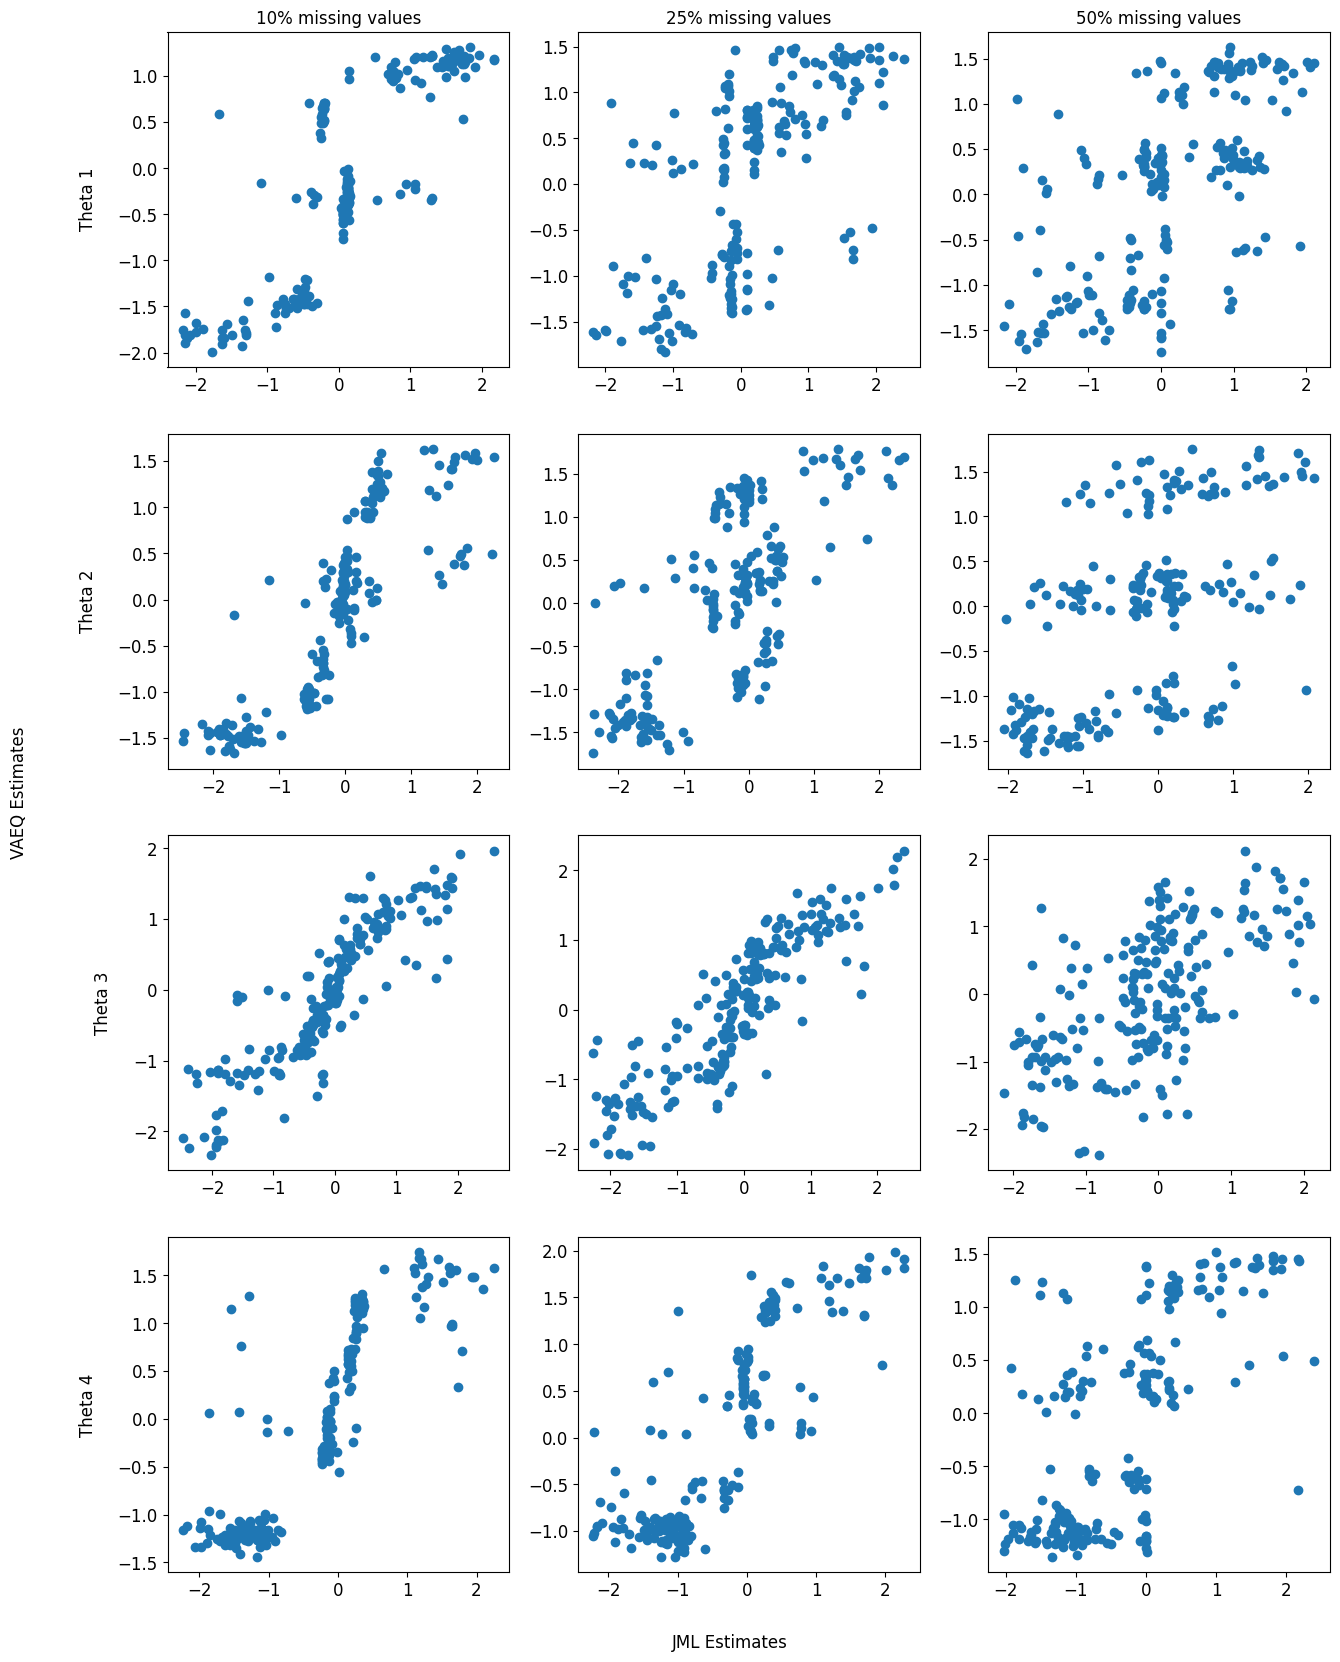

In [112]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

for i in range(4):
    # 1st column
    axs[i][0].scatter(theta_10_all_jml.values[:, i], theta_10_all['Thetas Estimation'].values.reshape((theta_10_all_jml.shape[1], theta_10_all_jml.shape[0])).transpose()[:, i])
    axs[i][0].tick_params(axis='x', labelsize=labelsize)
    axs[i][0].tick_params(axis='y', labelsize=labelsize)
    #axs[i][0].set_xlabel('VAE Estimates', **dict(size=labelsize, labelpad=5))

    # 2nd column
    axs[i][1].scatter(theta_25_all_jml.values[:, i], theta_25_all['Thetas Estimation'].values.reshape((theta_25_all_jml.shape[1], theta_25_all_jml.shape[0])).transpose()[:, i])
    axs[i][1].tick_params(axis='x', labelsize=labelsize)
    axs[i][1].tick_params(axis='y', labelsize=labelsize)
    #axs[i][1].set_xlabel('VAE Estimates', **dict(size=labelsize, labelpad=5))

    # 3rd column
    axs[i][2].scatter(theta_50_all_jml.values[:, i], theta_50_all['Thetas Estimation'].values.reshape((theta_50_all_jml.shape[1], theta_50_all_jml.shape[0])).transpose()[:, i])
    axs[i][2].tick_params(axis='x', labelsize=labelsize)
    axs[i][2].tick_params(axis='y', labelsize=labelsize)
    #axs[i][2].set_xlabel('VAE Estimates', **dict(size=labelsize, labelpad=5))

    # Format axes labels
    axs[i][0].set_ylabel('Theta ' + str(i+1) , **label_fmt)

axs[0][0].set_title('10% missing values')
axs[0][1].set_title('25% missing values')
axs[0][2].set_title('50% missing values')

fig.supxlabel('JML Estimates', y=0.07)
fig.supylabel('VAEQ Estimates')

In [120]:
theta_10_all_jml.values[:, 0]

array([ 0.04263096, -0.47667932,  0.05840007, -0.24455507,  1.53253586,
        0.7676818 ,  1.70556418,  0.06014521, -1.64192533, -1.34949682,
       -0.58787353,  0.14611974,  0.73038804,  0.94434582, -1.63113372,
        1.37731519, -0.86184533, -0.21285917,  0.05802745,  1.30180581,
       -1.29378673, -0.25625109,  0.79156692, -0.69466097, -0.3890057 ,
        1.30412182,  0.0585348 , -2.1553812 ,  1.50431613,  1.58959313,
       -0.4458548 , -0.88386488, -0.25844933,  1.7655274 ,  0.05757656,
       -1.90090595,  0.05366008,  0.13302261, -0.74325214,  0.06382494,
       -1.6412088 , -1.4914376 ,  0.13004432, -1.61130332,  0.13607216,
        0.78736181,  0.04846256,  1.06491274,  0.10728307, -2.18132654,
        1.72049062, -0.74999194, -0.52382468,  1.95541919, -2.15092022,
       -1.77649346,  0.13125579,  0.13270493,  1.62041055,  0.1322589 ,
       -0.74836024,  0.12507889,  1.91123892,  0.08331702,  1.08223977,
       -1.99815382,  0.52994795,  0.13435565,  1.06803802,  1.30

In [121]:
theta_10_all['Thetas Estimation'].values.reshape((theta_10_all_jml.shape[1], theta_10_all_jml.shape[0])).transpose()[:, 0]

array([-0.4452418 , -1.2854389 , -0.7667277 ,  0.33119327,  1.1947212 ,
        0.997977  ,  1.2194506 , -0.5553489 , -1.9018077 , -1.931605  ,
       -1.5163959 , -0.56112766,  1.0997399 , -0.17560503, -1.7586809 ,
        1.0999149 , -1.488916  ,  0.7058443 , -0.69808495, -0.31869033,
       -1.7914146 ,  0.5586596 ,  1.1579564 , -1.51281   , -0.25256938,
        1.2320782 , -0.5588667 , -1.8922782 ,  0.98827374,  1.127778  ,
       -1.2075827 , -1.7243856 ,  0.3773957 ,  0.9859376 , -0.58958375,
       -1.7461584 , -0.3291621 , -0.26867798, -1.5273196 , -0.58990777,
       -1.8402356 , -1.8119965 , -0.21707648, -1.8396492 ,  1.0563482 ,
        0.9787625 , -0.41975626, -0.17186922, -0.28924868, -1.7526665 ,
        1.1314049 , -1.4765341 , -1.3931572 ,  1.2257798 , -1.5659436 ,
       -1.9889189 , -0.28024158, -0.24797821,  1.2322049 , -0.12084961,
       -1.5680202 , -0.14365464,  1.0958844 , -0.3760298 ,  1.2038386 ,
       -1.7715168 , -0.3403255 , -0.2980562 , -0.2275986 ,  1.22

## Thetas of real missing dataset

Text(0.5, 1.0, '50% missing values')

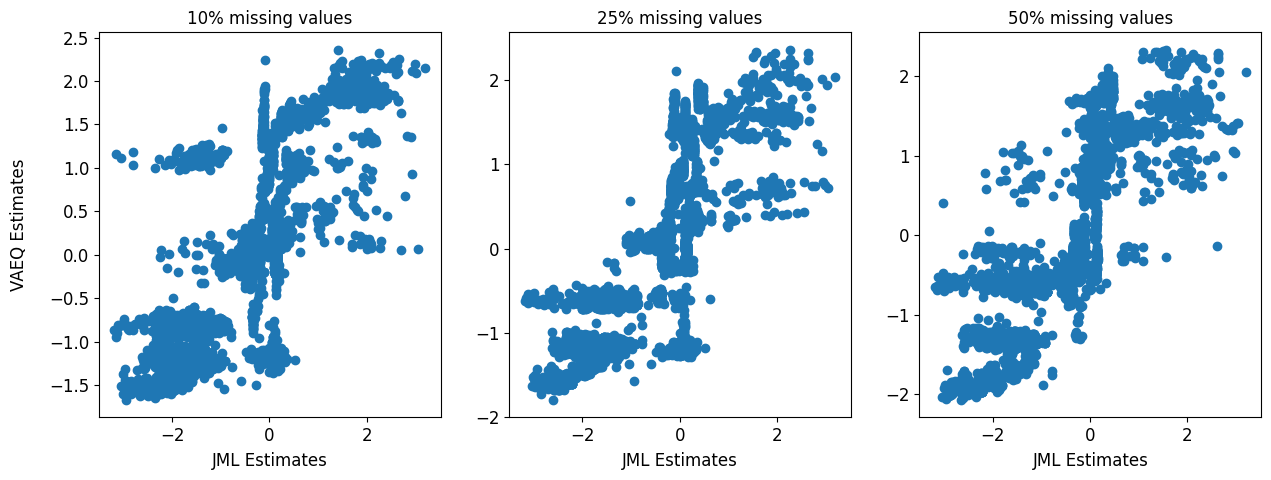

In [113]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

# 1st column
axs[0].scatter(theta_ds_jml.values.transpose().flatten(), theta_10_ds['Thetas Estimation'])
axs[0].tick_params(axis='x', labelsize=labelsize)
axs[0].tick_params(axis='y', labelsize=labelsize)
axs[0].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 2nd column
axs[1].scatter(theta_ds_jml.values.transpose().flatten(), theta_25_ds['Thetas Estimation'])
axs[1].tick_params(axis='x', labelsize=labelsize)
axs[1].tick_params(axis='y', labelsize=labelsize)
axs[1].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# 3rd column
axs[2].scatter(theta_ds_jml.values.transpose().flatten(), theta_50_ds['Thetas Estimation'])
axs[2].tick_params(axis='x', labelsize=labelsize)
axs[2].tick_params(axis='y', labelsize=labelsize)
axs[2].set_xlabel('JML Estimates', **dict(size=labelsize, labelpad=5))

# Format axes labels
axs[0].set_ylabel('VAEQ Estimates', **label_fmt)

axs[0].set_title('10% missing values')
axs[1].set_title('25% missing values')
axs[2].set_title('50% missing values')

In [12]:
theta_ds_jml.values[i]

array([-0.12536729, -0.36414429, -0.69090606, -1.65390901])

Text(0.02, 0.5, 'VAEQ Estimates')

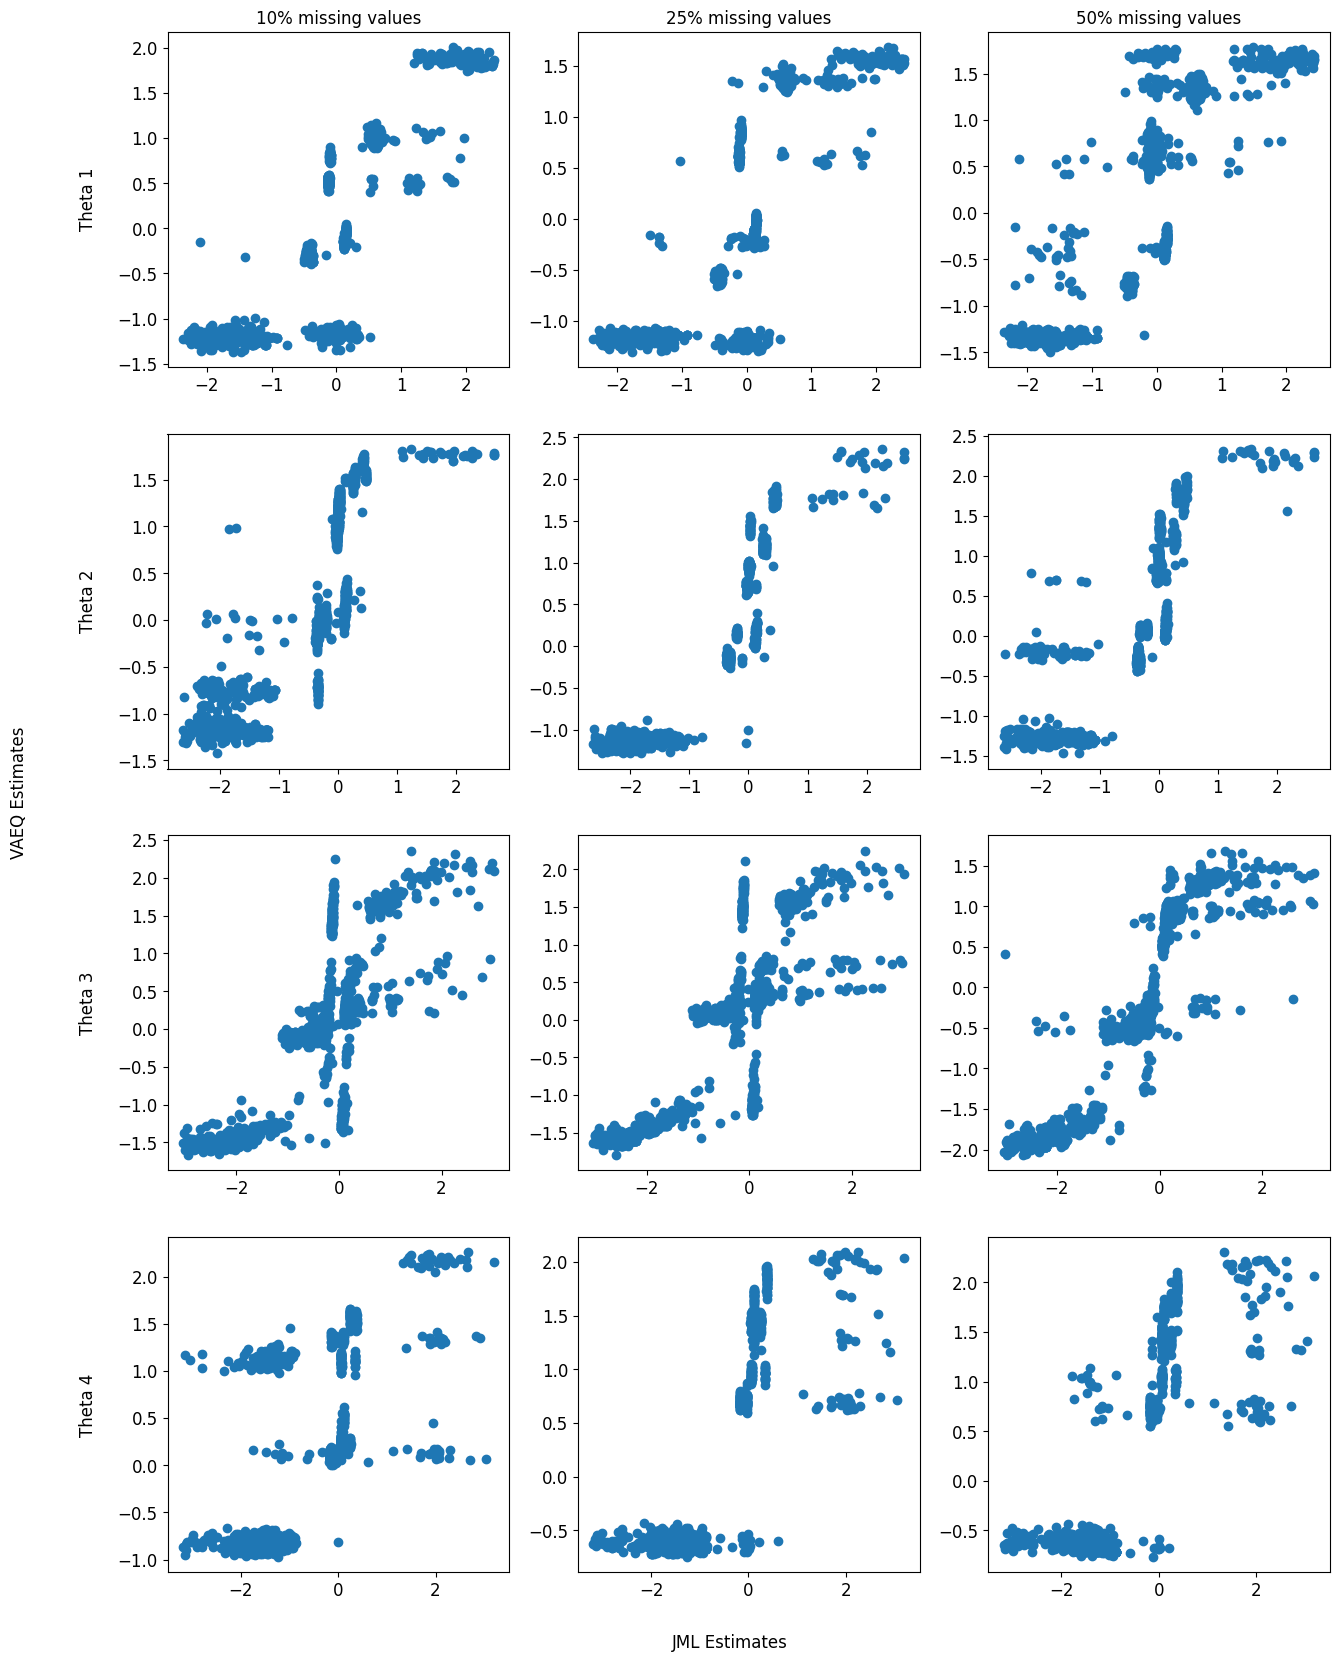

In [114]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

labelsize = 12
label_fmt = dict(size=labelsize, labelpad=15)

for i in range(4):
    # 1st column
    axs[i][0].scatter(theta_ds_jml.values[:, i], theta_10_ds['Thetas Estimation'].values.reshape((theta_ds_jml.shape[1], theta_ds_jml.shape[0])).transpose()[:, i])
    axs[i][0].tick_params(axis='x', labelsize=labelsize)
    axs[i][0].tick_params(axis='y', labelsize=labelsize)
    #axs[i][0].set_xlabel('VAE Estimates', **dict(size=labelsize, labelpad=5))

    # 2nd column
    axs[i][1].scatter(theta_ds_jml.values[:, i], theta_25_ds['Thetas Estimation'].values.reshape((theta_ds_jml.shape[1], theta_ds_jml.shape[0])).transpose()[:, i])
    axs[i][1].tick_params(axis='x', labelsize=labelsize)
    axs[i][1].tick_params(axis='y', labelsize=labelsize)
    #axs[i][1].set_xlabel('VAE Estimates', **dict(size=labelsize, labelpad=5))

    # 3rd column
    axs[i][2].scatter(theta_ds_jml.values[:, i], theta_50_ds['Thetas Estimation'].values.reshape((theta_ds_jml.shape[1], theta_ds_jml.shape[0])).transpose()[:, i])
    axs[i][2].tick_params(axis='x', labelsize=labelsize)
    axs[i][2].tick_params(axis='y', labelsize=labelsize)
    #axs[i][2].set_xlabel('VAE Estimates', **dict(size=labelsize, labelpad=5))

    # Format axes labels
    axs[i][0].set_ylabel('Theta ' + str(i+1) , **label_fmt)

axs[0][0].set_title('10% missing values')
axs[0][1].set_title('25% missing values')
axs[0][2].set_title('50% missing values')

fig.supxlabel('JML Estimates', y=0.07)
fig.supylabel('VAEQ Estimates')

In [102]:
df_downstream = downstream_cnt.values[:,2:]
df_downstream = df_downstream[:, 10:]

In [103]:
df_downstream.shape

(1427, 9)

In [104]:
total_dim1 = []
for line in df_downstream:
    total_dim1.append(np.count_nonzero(line))
    print('%d' % (np.count_nonzero(line)))

4
5
6
1
3
4
2
2
5
3
3
5
2
5
4
3
1
4
4
4
5
2
3
2
6
5
3
4
3
2
4
5
4
4
4
4
5
2
3
3
3
1
4
6
5
2
6
5
6
3
5
3
5
4
4
2
4
3
4
5
3
1
4
4
3
2
3
6
3
4
5
4
3
5
5
4
3
5
3
6
3
2
7
2
5
2
5
3
1
3
4
4
3
5
3
3
2
6
3
5
3
5
4
3
6
1
4
4
6
3
6
2
3
5
5
4
4
6
3
3
4
3
4
6
6
4
3
3
4
4
6
4
5
1
3
6
3
2
4
4
1
2
4
1
4
2
3
5
3
3
3
5
4
4
3
5
1
2
4
3
1
4
5
4
4
4
1
2
4
4
4
4
4
4
2
2
2
2
3
4
4
3
3
2
3
5
4
6
4
4
5
2
3
0
4
4
2
5
5
6
4
2
2
5
3
5
5
3
2
4
2
3
5
3
3
4
2
4
4
2
0
6
2
2
2
4
4
6
5
4
3
3
5
5
3
4
5
4
4
3
2
2
5
4
4
6
3
4
3
3
3
3
6
4
4
4
5
3
6
4
1
1
4
3
4
8
2
5
3
1
5
3
4
2
5
1
3
3
5
3
3
2
5
4
3
2
1
5
3
2
3
4
4
3
2
5
2
5
2
1
2
1
5
4
5
5
4
6
3
4
6
3
4
4
3
3
5
2
5
3
5
5
3
0
4
3
2
5
4
6
2
4
2
5
4
1
3
3
3
3
2
2
4
5
2
2
4
2
3
4
2
4
3
4
2
2
2
6
5
7
4
4
4
4
3
2
2
4
4
5
1
5
4
5
4
3
5
5
5
5
4
6
4
6
7
4
2
2
3
4
3
2
3
5
1
5
4
4
5
4
5
6
3
1
4
3
1
2
3
0
2
3
2
4
7
2
2
4
3
6
4
5
3
2
3
5
2
4
3
4
4
4
2
0
1
4
5
4
2
3
7
4
4
2
7
5
4
4
4
4
3
4
5
3
1
3
4
3
5
2
3
1
5
4
7
3
4
5
4
4
1
1
3
5
7
5
4
5
4
5
3
2
2
4
3
4
2
5
4
5
3
6
2
4
3
5
6
4
3
4


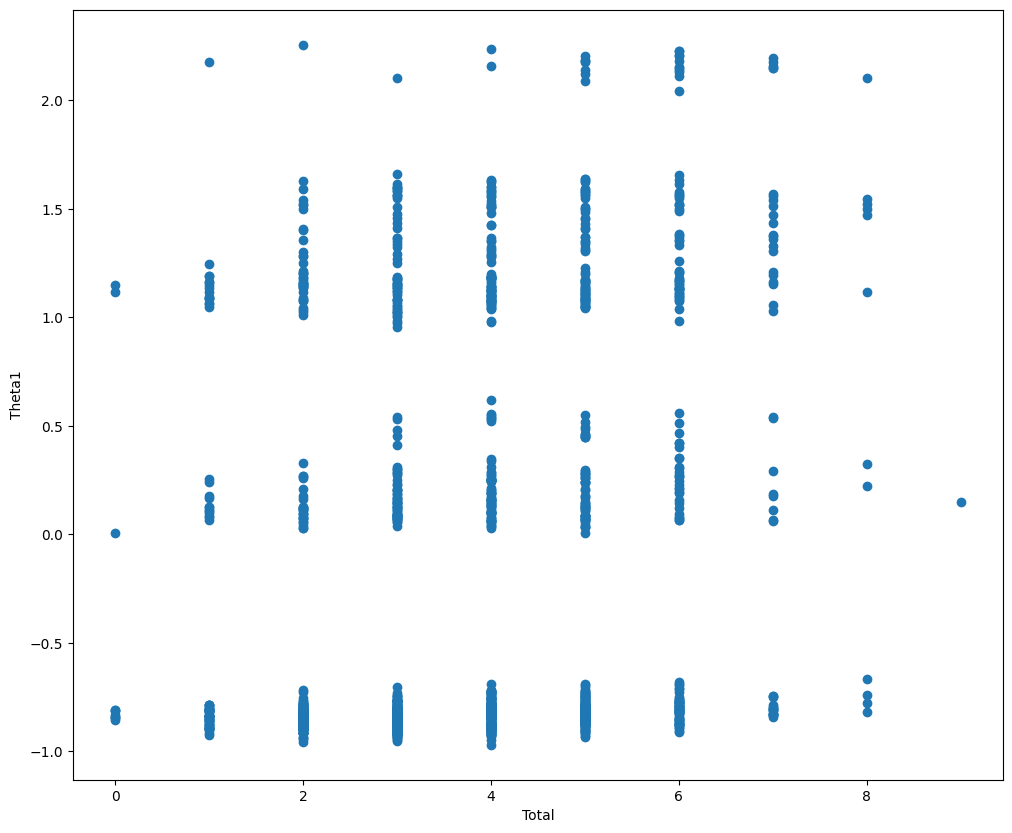

In [105]:
plt.figure(figsize=(12, 10))
plt.scatter(x=total_dim1, y=theta_10_ds['Thetas Estimation'].values.reshape((theta_ds_jml.shape[1], theta_ds_jml.shape[0])).transpose()[:, 3])
#plt.colorbar()
plt.xlabel("Total")
plt.ylabel("Theta1")
plt.show()

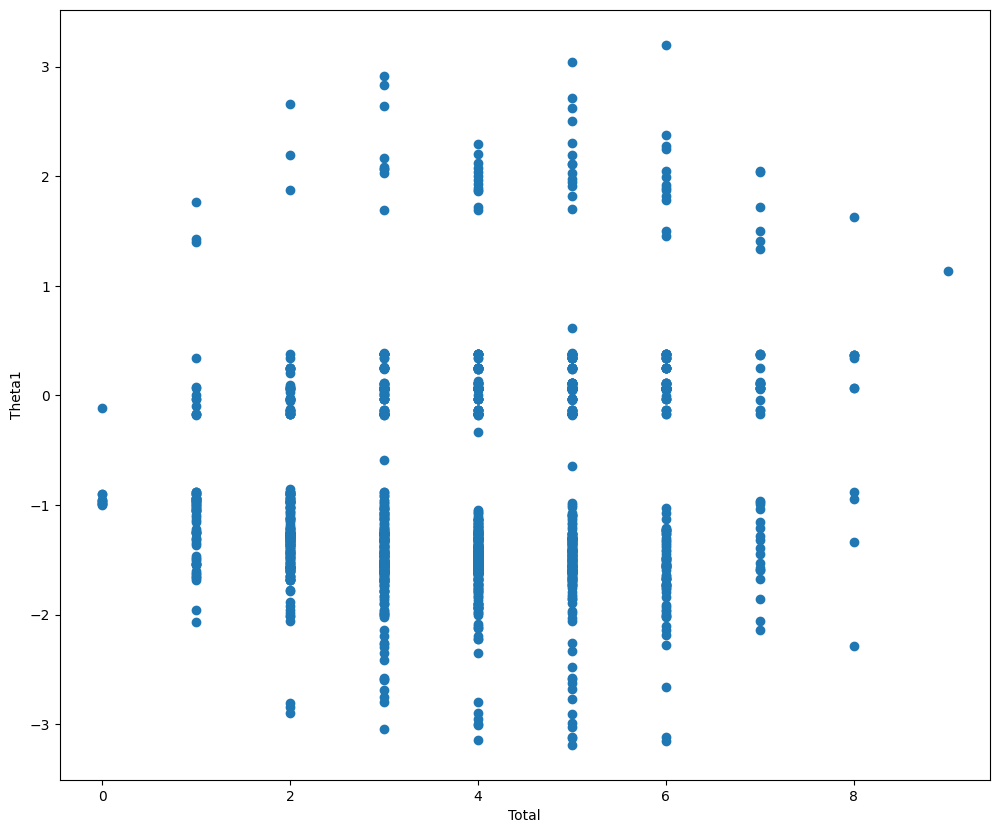

In [106]:
plt.figure(figsize=(12, 10))
plt.scatter(x=total_dim1, y=theta_ds_jml.values[:, 3])
#plt.colorbar()
plt.xlabel("Total")
plt.ylabel("Theta1")
plt.show()

In [19]:
print(test_cnt.shape)
print(theta_10_all_jml.shape)

(215, 20)
(215, 4)


In [20]:
#all_test_cnt = [name for name in test_cnt['CNT'] for i in range(4)]

Text(0.5, 0.07, 'VAEQ Estimates')

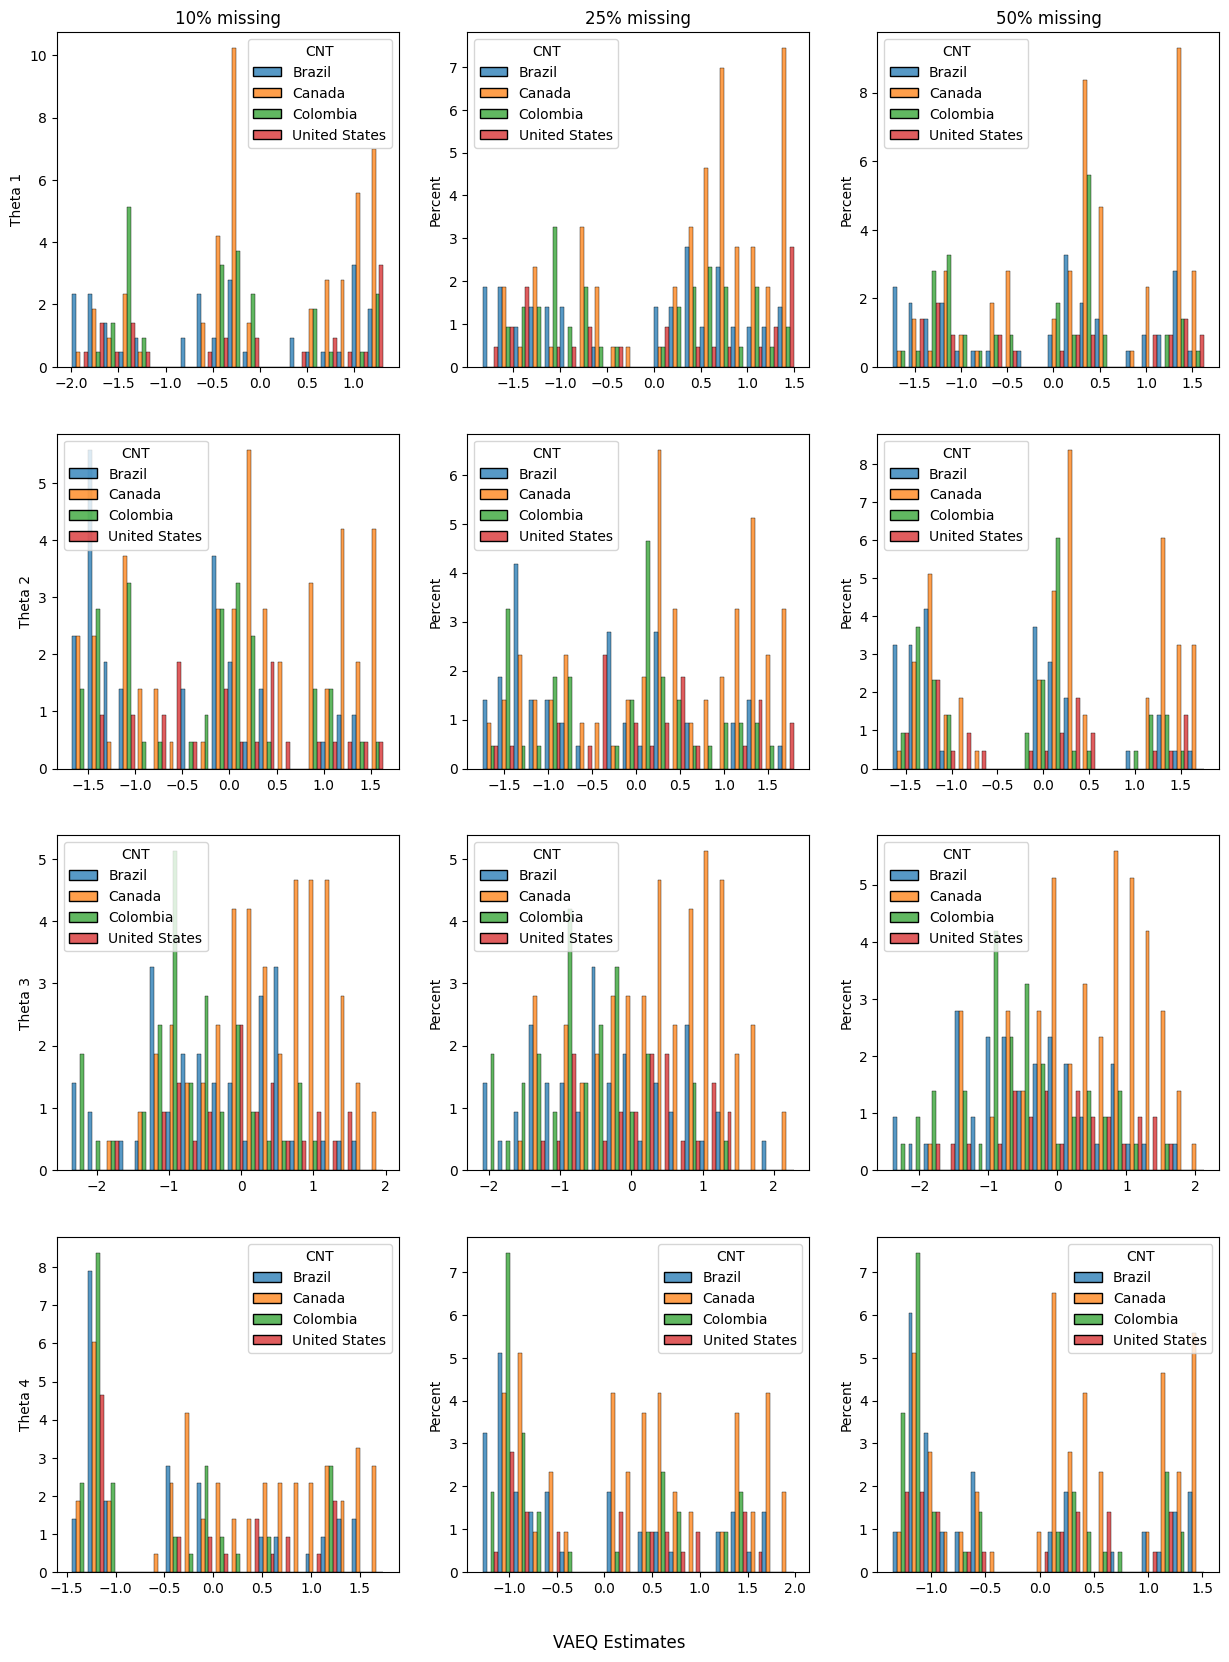

In [119]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

bins = 20
multiple = 'dodge'
stat = 'percent'

for i in range(4):
    sns.histplot(
        x=theta_10_all['Thetas Estimation'].values.reshape((theta_10_all_jml.shape[1], theta_10_all_jml.shape[0])).transpose()[:, i], 
        hue=test_cnt['CNT'], 
        #data=theta_10_all['Thetas Estimation'], 
        stat=stat, 
        bins=bins, 
        multiple=multiple, 
        ax=axs[i][0]
    )
    sns.histplot(
        x=theta_25_all['Thetas Estimation'].values.reshape((theta_25_all_jml.shape[1], theta_25_all_jml.shape[0])).transpose()[:, i], 
        hue=test_cnt['CNT'], 
        #data=theta_25_all['Thetas Estimation'], 
        stat=stat, 
        bins=bins, 
        multiple=multiple, 
        ax=axs[i][1]
    )
    sns.histplot(
        x=theta_50_all['Thetas Estimation'].values.reshape((theta_50_all_jml.shape[1], theta_50_all_jml.shape[0])).transpose()[:, i], 
        hue=test_cnt['CNT'], 
        #data=theta_50_all['Thetas Estimation'], 
        stat=stat, 
        bins=bins, 
        multiple=multiple, 
        ax=axs[i][2]
    )

    # Format axes labels
    axs[i][0].set_ylabel('Theta ' + str(i+1))

axs[0][0].set_title('10% missing')
axs[0][1].set_title('25% missing')
axs[0][2].set_title('50% missing')

fig.supxlabel('VAEQ Estimates', y=0.07)

Text(0.5, 0.07, 'JML Estimates')

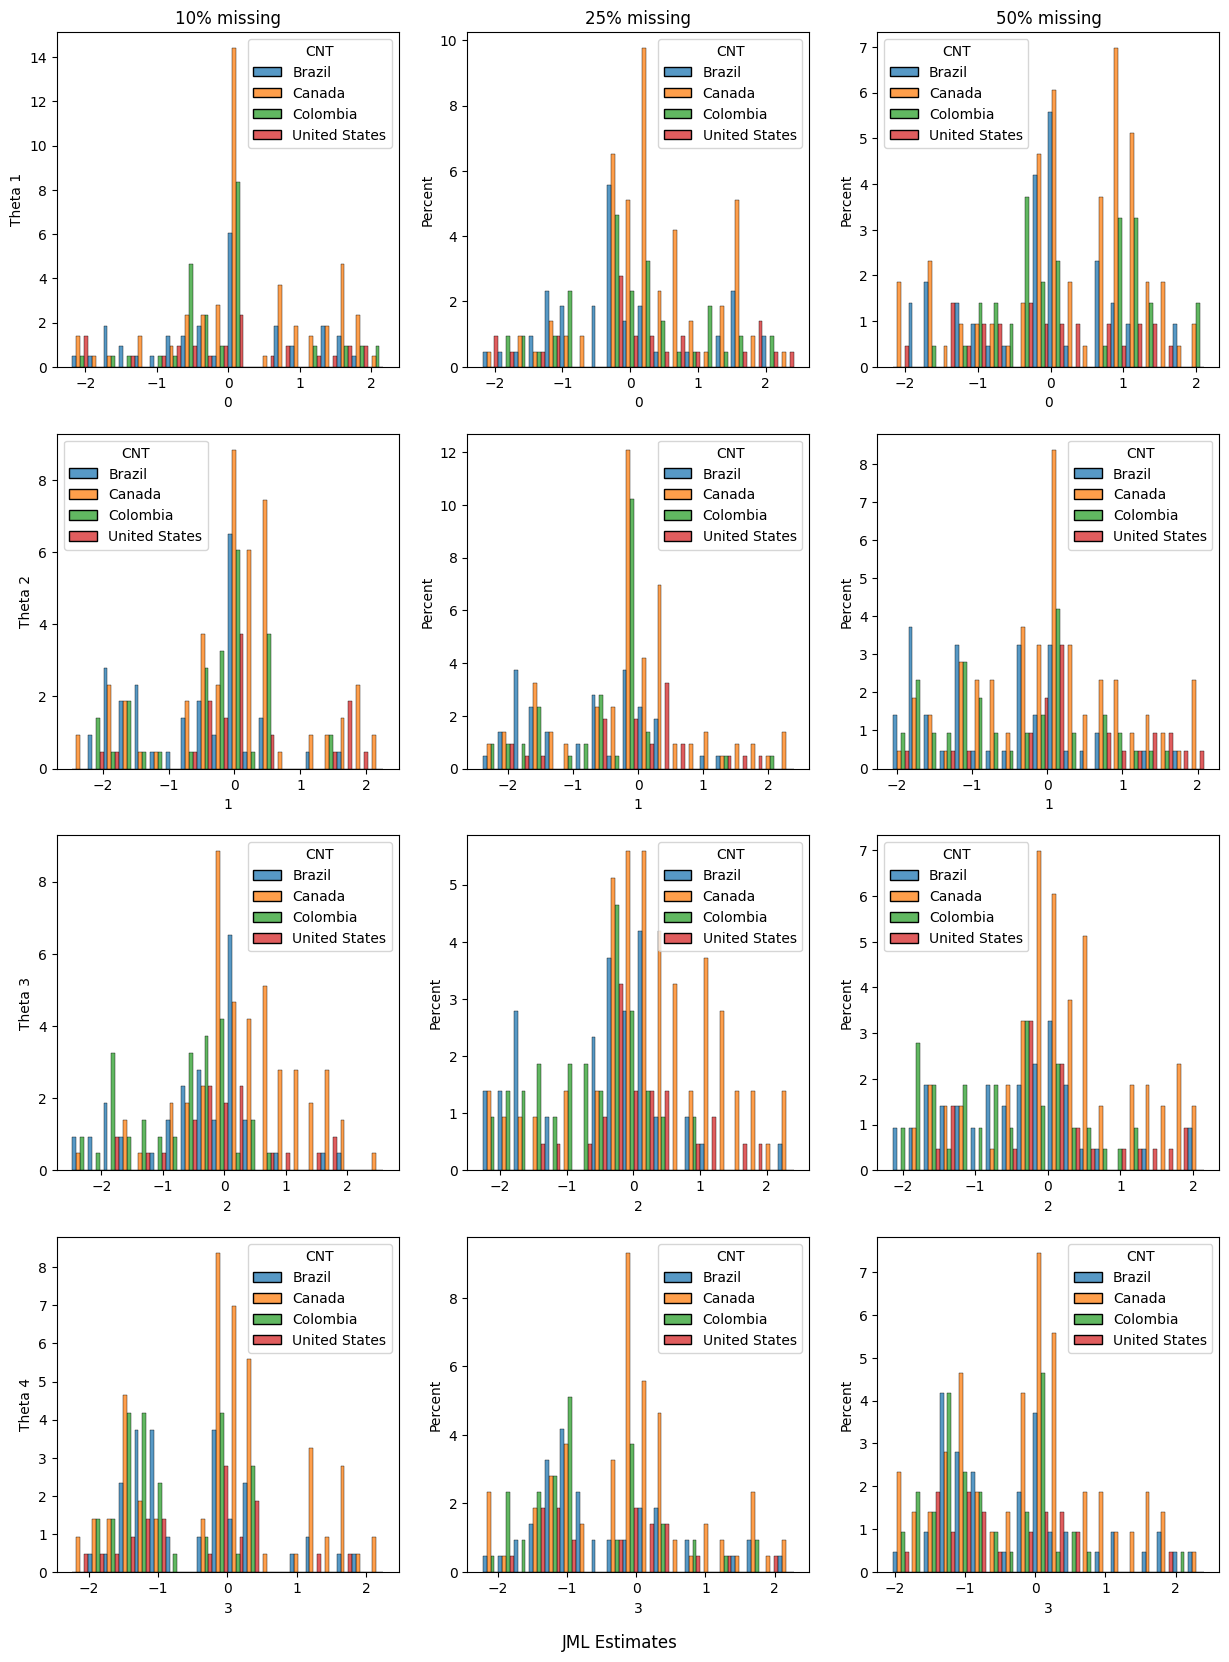

In [22]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

bins = 20
multiple = 'dodge'
stat = 'percent'

for i in range(4):
    sns.histplot(
        x=theta_10_all_jml.iloc[:, i], 
        hue=test_cnt['CNT'], 
        #data=theta_10_all_jml, 
        stat=stat, 
        bins=bins, 
        multiple=multiple, 
        ax=axs[i][0]
    )
    sns.histplot(
        x=theta_25_all_jml.iloc[:, i], 
        hue=test_cnt['CNT'], 
        #data=theta_25_all_jml, 
        stat=stat, 
        bins=bins, 
        multiple=multiple, 
        ax=axs[i][1]
    )
    sns.histplot(
        x=theta_50_all_jml.iloc[:, i], 
        hue=test_cnt['CNT'], 
        #data=theta_50_all_jml, 
        stat=stat, 
        bins=bins, 
        multiple=multiple, 
        ax=axs[i][2]
    )

    # Format axes labels
    axs[i][0].set_ylabel('Theta ' + str(i+1))

axs[0][0].set_title('10% missing')
axs[0][1].set_title('25% missing')
axs[0][2].set_title('50% missing')

fig.supxlabel('JML Estimates', y=0.07)

In [23]:
df_10_all = pd.DataFrame(theta_10_all['Thetas Estimation'].values.reshape((theta_10_all_jml.shape[1], theta_10_all_jml.shape[0])).transpose())
df_25_all = pd.DataFrame(theta_25_all['Thetas Estimation'].values.reshape((theta_25_all_jml.shape[1], theta_25_all_jml.shape[0])).transpose())
df_50_all = pd.DataFrame(theta_50_all['Thetas Estimation'].values.reshape((theta_50_all_jml.shape[1], theta_50_all_jml.shape[0])).transpose())

In [24]:
df_10_all = df_10_all.rename(columns={0:'T1', 1:'T2', 2:'T3', 3:'T4'})
df_25_all = df_25_all.rename(columns={0:'T1', 1:'T2', 2:'T3', 3:'T4'})
df_50_all = df_50_all.rename(columns={0:'T1', 1:'T2', 2:'T3', 3:'T4'})

In [25]:
df_10_all = pd.concat([df_10_all, test_cnt['CNT']], axis=1)
df_25_all = pd.concat([df_25_all, test_cnt['CNT']], axis=1)
df_50_all = pd.concat([df_50_all, test_cnt['CNT']], axis=1)

In [26]:
df_10_all

,T1,T2,T3,T4,CNT
0,-0.445242,-1.450937,-0.946549,-1.213035,Brazil
1,-1.285439,-1.544200,-2.125582,-1.215826,Brazil
2,-0.766728,-0.066327,0.426488,-0.022192,Brazil
3,0.331193,0.319950,1.711347,-0.428290,Brazil
4,1.194721,1.187834,1.111442,1.523913,Brazil
...,...,...,...,...,...
210,0.683497,1.207840,0.401345,0.714490,United States
211,0.679082,0.120094,-0.483497,-1.202754,United States
212,1.168541,1.564998,1.304647,-0.123467,United States
213,1.205408,0.390516,1.470641,-0.033988,United States


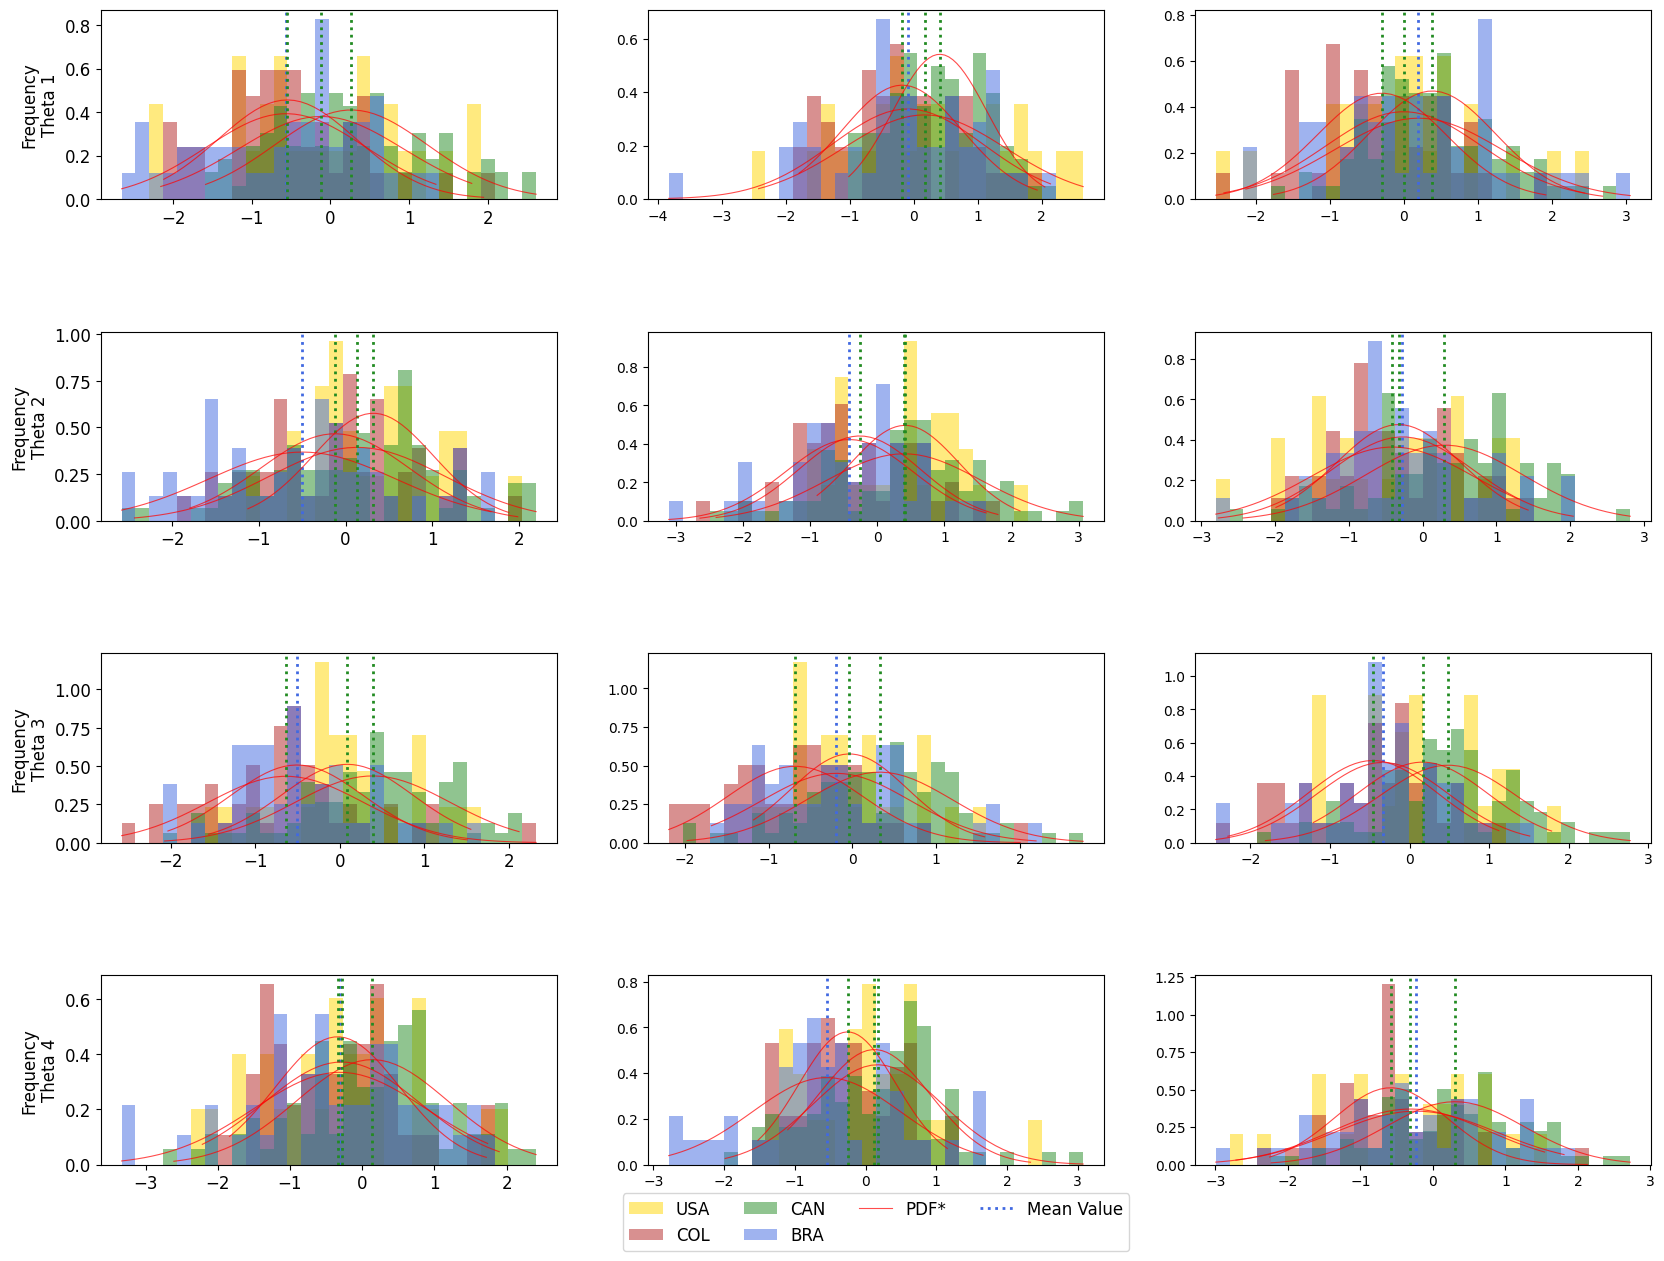

In [124]:
num_skills = 4
ttl = ['θ' + str(i+1) for i in range(num_skills)]
colors = ['royalblue', 'forestgreen', 'firebrick', 'gold']
leg = ['BRA', 'CAN', 'COL', 'USA'] 
fig, axs = plt.subplots(4, 3, figsize=(20, 15))
#axs = axs.ravel()

for i in range(num_skills):
    bra10 = df_10_all[df_10_all['CNT'] == 'Brazil'].iloc[:, i]
    can10 = df_10_all[df_10_all['CNT'] == 'Canada'].iloc[:, i]
    col10 = df_10_all[df_10_all['CNT'] == 'Colombia'].iloc[:, i]
    usa10 = df_10_all[df_10_all['CNT'] == 'United States'].iloc[:, i]

    bra10 = np.random.normal(bra10.mean(), bra10.std(), bra10.shape[0])
    can10 = np.random.normal(can10.mean(), can10.std(), can10.shape[0])
    col10 = np.random.normal(col10.mean(), col10.std(), col10.shape[0])
    usa10 = np.random.normal(usa10.mean(), usa10.std(), usa10.shape[0])

    bra25 = df_25_all[df_25_all['CNT'] == 'Brazil'].iloc[:, i]
    can25 = df_25_all[df_25_all['CNT'] == 'Canada'].iloc[:, i]
    col25 = df_25_all[df_25_all['CNT'] == 'Colombia'].iloc[:, i]
    usa25 = df_25_all[df_25_all['CNT'] == 'United States'].iloc[:, i]

    bra25 = np.random.normal(bra25.mean(), bra25.std(), bra25.shape[0])
    can25 = np.random.normal(can25.mean(), can25.std(), can25.shape[0])
    col25 = np.random.normal(col25.mean(), col25.std(), col25.shape[0])
    usa25 = np.random.normal(usa25.mean(), usa25.std(), usa25.shape[0])

    bra50 = df_50_all[df_50_all['CNT'] == 'Brazil'].iloc[:, i]
    can50 = df_50_all[df_50_all['CNT'] == 'Canada'].iloc[:, i]
    col50 = df_50_all[df_50_all['CNT'] == 'Colombia'].iloc[:, i]
    usa50 = df_50_all[df_50_all['CNT'] == 'United States'].iloc[:, i]

    bra50 = np.random.normal(bra50.mean(), bra50.std(), bra50.shape[0])
    can50 = np.random.normal(can50.mean(), can50.std(), can50.shape[0])
    col50 = np.random.normal(col50.mean(), col50.std(), col50.shape[0])
    usa50 = np.random.normal(usa50.mean(), usa50.std(), usa50.shape[0])
    
    #q25, q75 = np.percentile(can10, [25, 75])
    #bin_width = 2 * (q75 - q25) * can10.shape[0] ** (-1/3)
    #bins = round((can10.max() - can10.min()) / bin_width)
    bins = 30

    axs[i][0].hist((bra10, can10, col10, usa10), bins=bins, histtype='stepfilled', density=True, alpha=0.5, color=colors, label=leg)
    axs[i][1].hist((bra25, can25, col25, usa25), bins=bins, histtype='stepfilled', density=True, alpha=0.5, color=colors, label=leg)
    axs[i][2].hist((bra50, can50, col50, usa50), bins=bins, histtype='stepfilled', density=True, alpha=0.5, color=colors, label=leg)
    
    # 10%
    xRange = np.linspace(np.min(bra10), np.max(bra10))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, bra10.mean(), bra10.std())
    axs[i][0].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8, label="PDF*")
    axs[i][0].axvline(bra10.mean(), color=colors[0], linestyle = ':',linewidth=2, label="Valor Médio")
    
    xRange = np.linspace(np.min(can10), np.max(can10))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, can10.mean(), can10.std())
    axs[i][0].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
    axs[i][0].axvline(can10.mean(), color=colors[1], linestyle = ':',linewidth=2)

    xRange = np.linspace(np.min(col10), np.max(col10))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, col10.mean(), col10.std())
    axs[i][0].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
    axs[i][0].axvline(col10.mean(), color=colors[1], linestyle = ':',linewidth=2)

    xRange = np.linspace(np.min(usa10), np.max(usa10))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, usa10.mean(), usa10.std())
    axs[i][0].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
    axs[i][0].axvline(usa10.mean(), color=colors[1], linestyle = ':',linewidth=2)

    # 25%
    xRange = np.linspace(np.min(bra25), np.max(bra25))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, bra25.mean(), bra25.std())
    axs[i][1].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8, label="PDF*")
    axs[i][1].axvline(bra25.mean(), color=colors[0], linestyle = ':',linewidth=2, label="Valor Médio")
    
    xRange = np.linspace(np.min(can25), np.max(can25))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, can25.mean(), can25.std())
    axs[i][1].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
    axs[i][1].axvline(can25.mean(), color=colors[1], linestyle = ':',linewidth=2)

    xRange = np.linspace(np.min(col25), np.max(col25))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, col25.mean(), col25.std())
    axs[i][1].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
    axs[i][1].axvline(col25.mean(), color=colors[1], linestyle = ':',linewidth=2)

    xRange = np.linspace(np.min(usa25), np.max(usa25))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, usa25.mean(), usa25.std())
    axs[i][1].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
    axs[i][1].axvline(usa25.mean(), color=colors[1], linestyle = ':',linewidth=2)

    # 50%
    xRange = np.linspace(np.min(bra50), np.max(bra50))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, bra50.mean(), bra50.std())
    axs[i][2].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8, label="PDF*")
    axs[i][2].axvline(bra50.mean(), color=colors[0], linestyle = ':',linewidth=2, label="Mean Value")
    
    xRange = np.linspace(np.min(can50), np.max(can50))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, can50.mean(), can50.std())
    axs[i][2].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
    axs[i][2].axvline(can50.mean(), color=colors[1], linestyle = ':',linewidth=2)

    xRange = np.linspace(np.min(col50), np.max(col50))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, col50.mean(), col50.std())
    axs[i][2].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
    axs[i][2].axvline(col50.mean(), color=colors[1], linestyle = ':',linewidth=2)

    xRange = np.linspace(np.min(usa50), np.max(usa50))#, len(cs))
    nd = sc.stats.norm.pdf(xRange, usa50.mean(), usa50.std())
    axs[i][2].plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
    axs[i][2].axvline(usa50.mean(), color=colors[1], linestyle = ':',linewidth=2)

    #axs[i].set_title(ttl, loc='left', color='#6E6E6E', fontsize=8.5, fontweight='bold', pad=12)
    axs[i][0].set_ylabel("Frequency\nTheta " + str(i+1), fontsize=12)
    axs[i][0].tick_params(axis='both', which='major', labelsize=12) 
axs[num_skills-1][2].legend(loc='lower center', fontsize=12, bbox_to_anchor=(-0.7, -0.5),ncol=4)
axs[num_skills-1][2].set_xlabel("", fontsize=8, labelpad=3)
plt.subplots_adjust(hspace=0.7)

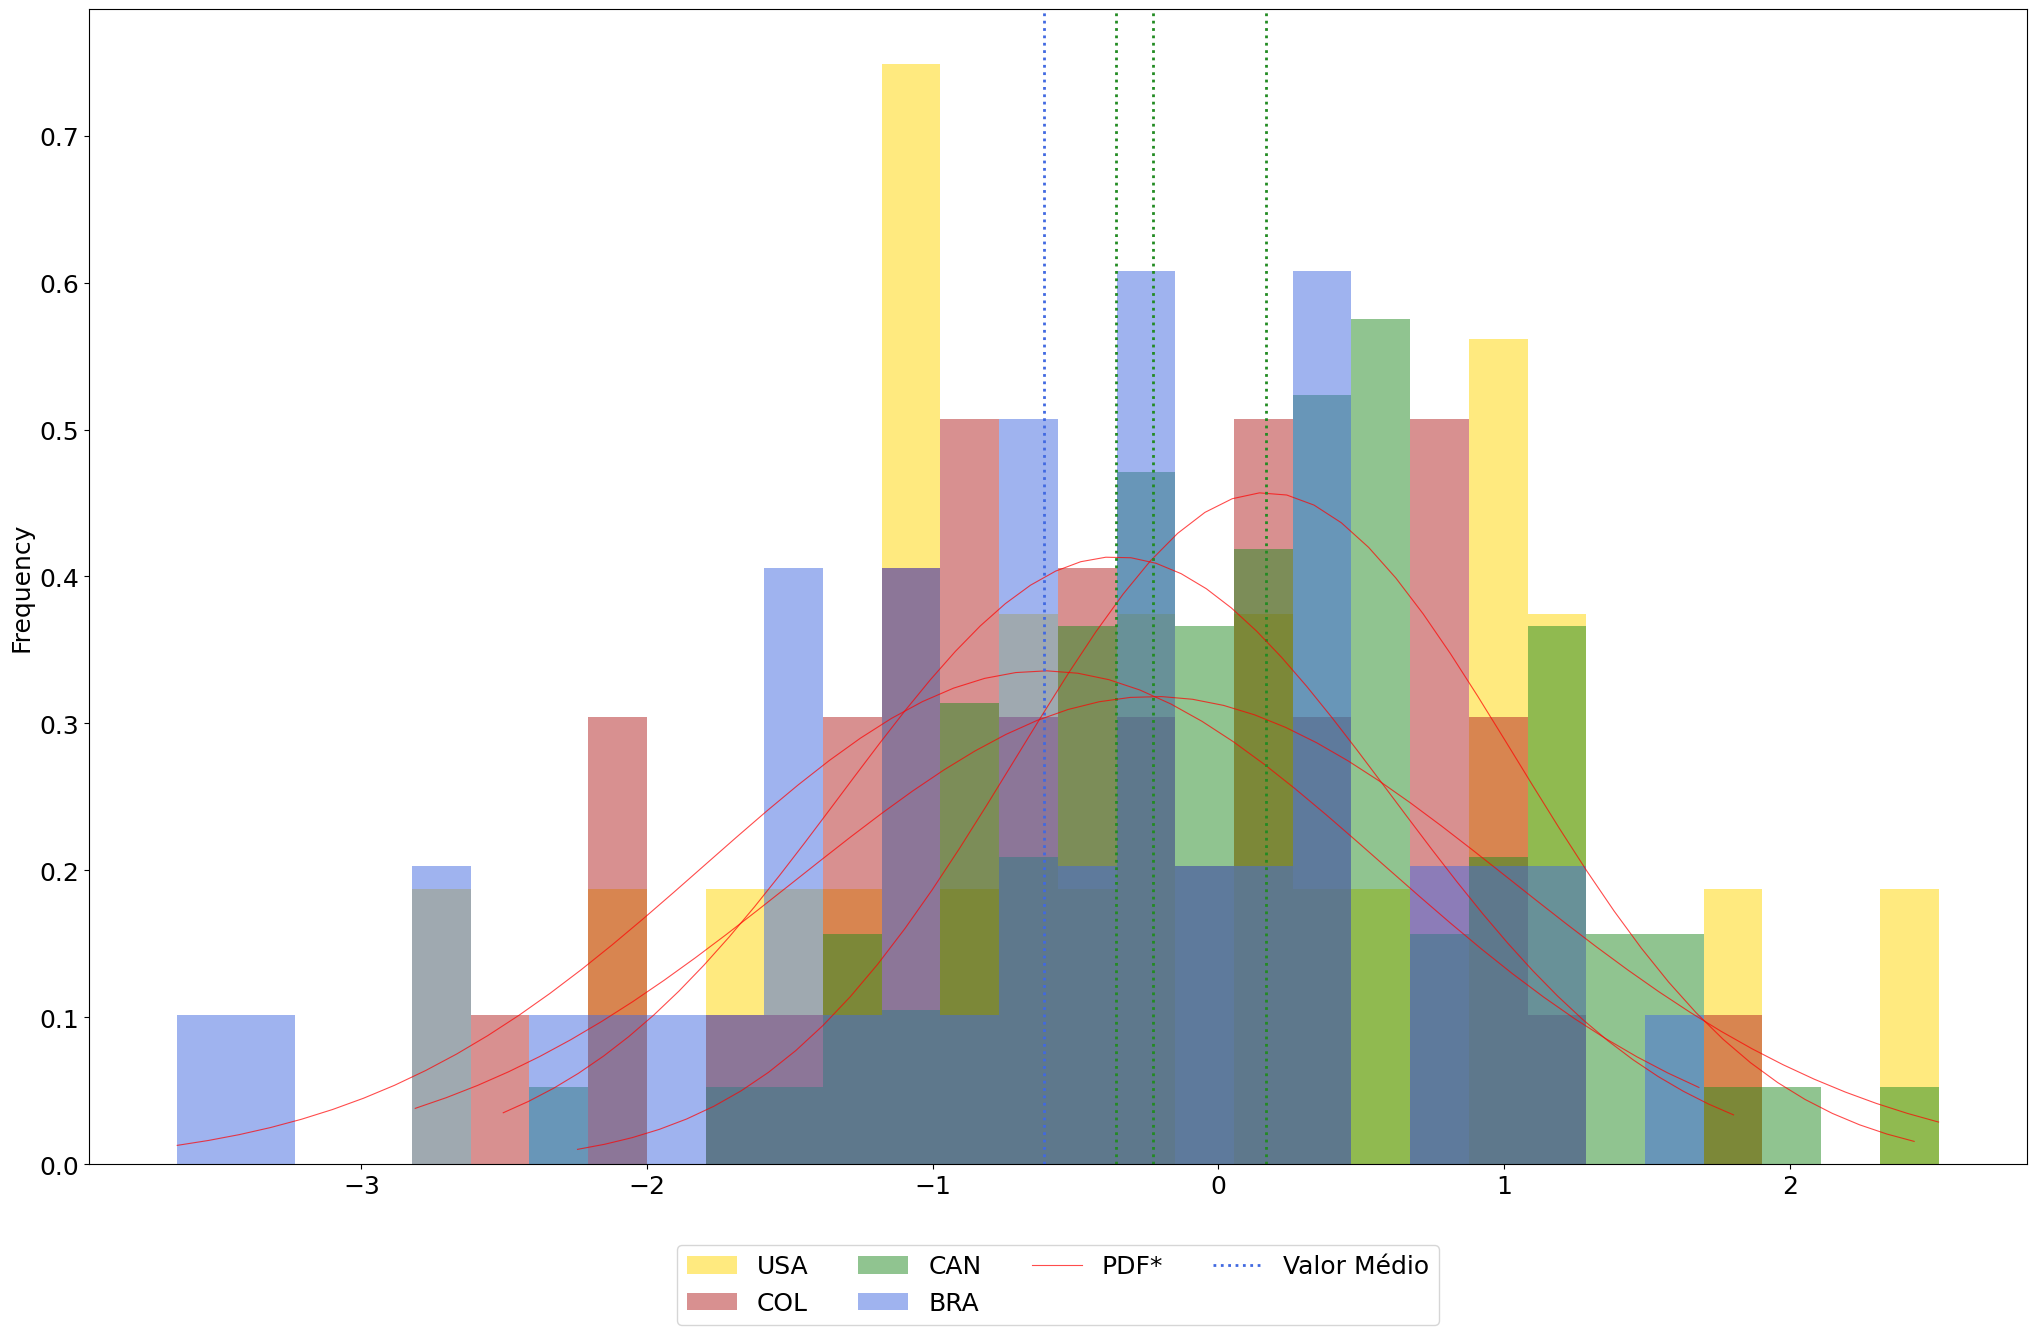

In [28]:
num_skills = 4
ttl = ['θ' + str(i+1) for i in range(num_skills)]
colors = ['royalblue', 'forestgreen', 'firebrick', 'gold']
leg = ['BRA', 'CAN', 'COL', 'USA'] 
plt.figure(figsize=(25, 15))
#axs = axs.ravel()

bra10 = df_10_all[df_10_all['CNT'] == 'Brazil'].iloc[:, 0]
can10 = df_10_all[df_10_all['CNT'] == 'Canada'].iloc[:, 0]
col10 = df_10_all[df_10_all['CNT'] == 'Colombia'].iloc[:, 0]
usa10 = df_10_all[df_10_all['CNT'] == 'United States'].iloc[:, 0]

bra10 = np.random.normal(bra10.mean(), bra10.std(), bra10.shape[0])
can10 = np.random.normal(can10.mean(), can10.std(), can10.shape[0])
col10 = np.random.normal(col10.mean(), col10.std(), col10.shape[0])
usa10 = np.random.normal(usa10.mean(), usa10.std(), usa10.shape[0])

#q25, q75 = np.percentile(can10, [25, 75])
#bin_width = 2 * (q75 - q25) * can10.shape[0] ** (-1/3)
#bins = round((can10.max() - can10.min()) / bin_width)
bins = 30

plt.hist((bra10, can10, col10, usa10), bins=bins, histtype='stepfilled', density=True, alpha=0.5, color=colors, label=leg)
    
# 10%
xRange = np.linspace(np.min(bra10), np.max(bra10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, bra10.mean(), bra10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8, label="PDF*")
plt.axvline(bra10.mean(), color=colors[0], linestyle = ':',linewidth=2, label="Valor Médio")

xRange = np.linspace(np.min(can10), np.max(can10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, can10.mean(), can10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(can10.mean(), color=colors[1], linestyle = ':',linewidth=2)

xRange = np.linspace(np.min(col10), np.max(col10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, col10.mean(), col10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(col10.mean(), color=colors[1], linestyle = ':',linewidth=2)

xRange = np.linspace(np.min(usa10), np.max(usa10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, usa10.mean(), usa10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(usa10.mean(), color=colors[1], linestyle = ':',linewidth=2)

plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylabel("Frequency", fontsize=18) 
plt.legend(loc='lower center', fontsize=18, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.xlabel("", fontsize=8, labelpad=3)
plt.subplots_adjust(hspace=0.7)
plt.show()

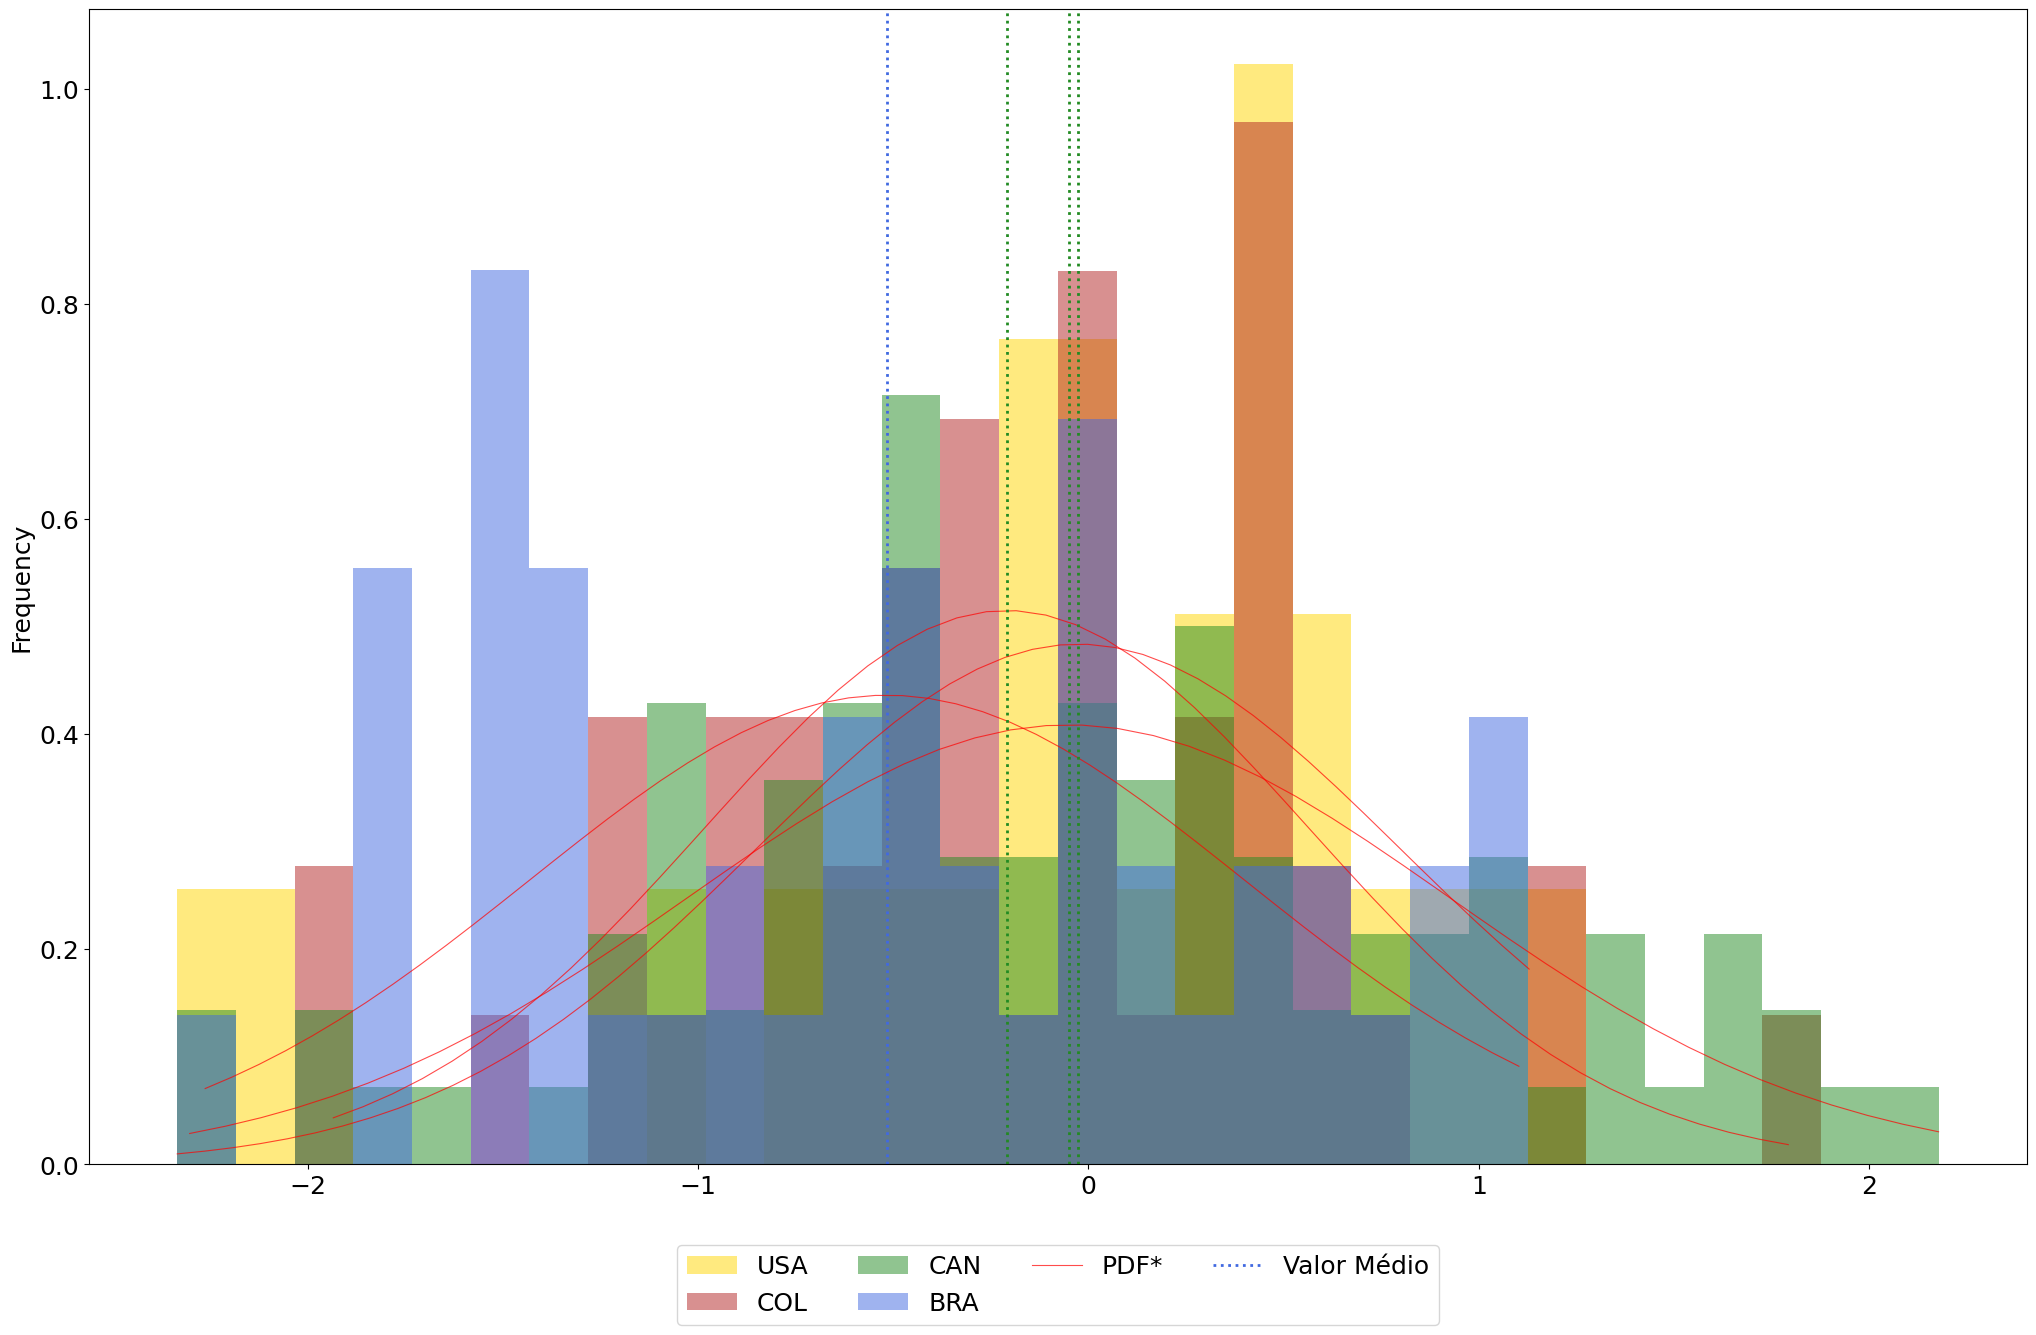

In [29]:
num_skills = 4
ttl = ['θ' + str(i+1) for i in range(num_skills)]
colors = ['royalblue', 'forestgreen', 'firebrick', 'gold']
leg = ['BRA', 'CAN', 'COL', 'USA'] 
plt.figure(figsize=(25, 15))
#axs = axs.ravel()

bra10 = df_10_all[df_10_all['CNT'] == 'Brazil'].iloc[:, 1]
can10 = df_10_all[df_10_all['CNT'] == 'Canada'].iloc[:, 1]
col10 = df_10_all[df_10_all['CNT'] == 'Colombia'].iloc[:, 1]
usa10 = df_10_all[df_10_all['CNT'] == 'United States'].iloc[:, 1]

bra10 = np.random.normal(bra10.mean(), bra10.std(), bra10.shape[0])
can10 = np.random.normal(can10.mean(), can10.std(), can10.shape[0])
col10 = np.random.normal(col10.mean(), col10.std(), col10.shape[0])
usa10 = np.random.normal(usa10.mean(), usa10.std(), usa10.shape[0])

#q25, q75 = np.percentile(can10, [25, 75])
#bin_width = 2 * (q75 - q25) * can10.shape[0] ** (-1/3)
#bins = round((can10.max() - can10.min()) / bin_width)
bins = 30

plt.hist((bra10, can10, col10, usa10), bins=bins, histtype='stepfilled', density=True, alpha=0.5, color=colors, label=leg)
    
# 10%
xRange = np.linspace(np.min(bra10), np.max(bra10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, bra10.mean(), bra10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8, label="PDF*")
plt.axvline(bra10.mean(), color=colors[0], linestyle = ':',linewidth=2, label="Valor Médio")

xRange = np.linspace(np.min(can10), np.max(can10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, can10.mean(), can10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(can10.mean(), color=colors[1], linestyle = ':',linewidth=2)

xRange = np.linspace(np.min(col10), np.max(col10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, col10.mean(), col10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(col10.mean(), color=colors[1], linestyle = ':',linewidth=2)

xRange = np.linspace(np.min(usa10), np.max(usa10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, usa10.mean(), usa10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(usa10.mean(), color=colors[1], linestyle = ':',linewidth=2)

plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylabel("Frequency", fontsize=18) 
plt.legend(loc='lower center', fontsize=18, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.xlabel("", fontsize=8, labelpad=3)
plt.subplots_adjust(hspace=0.7)
plt.show()

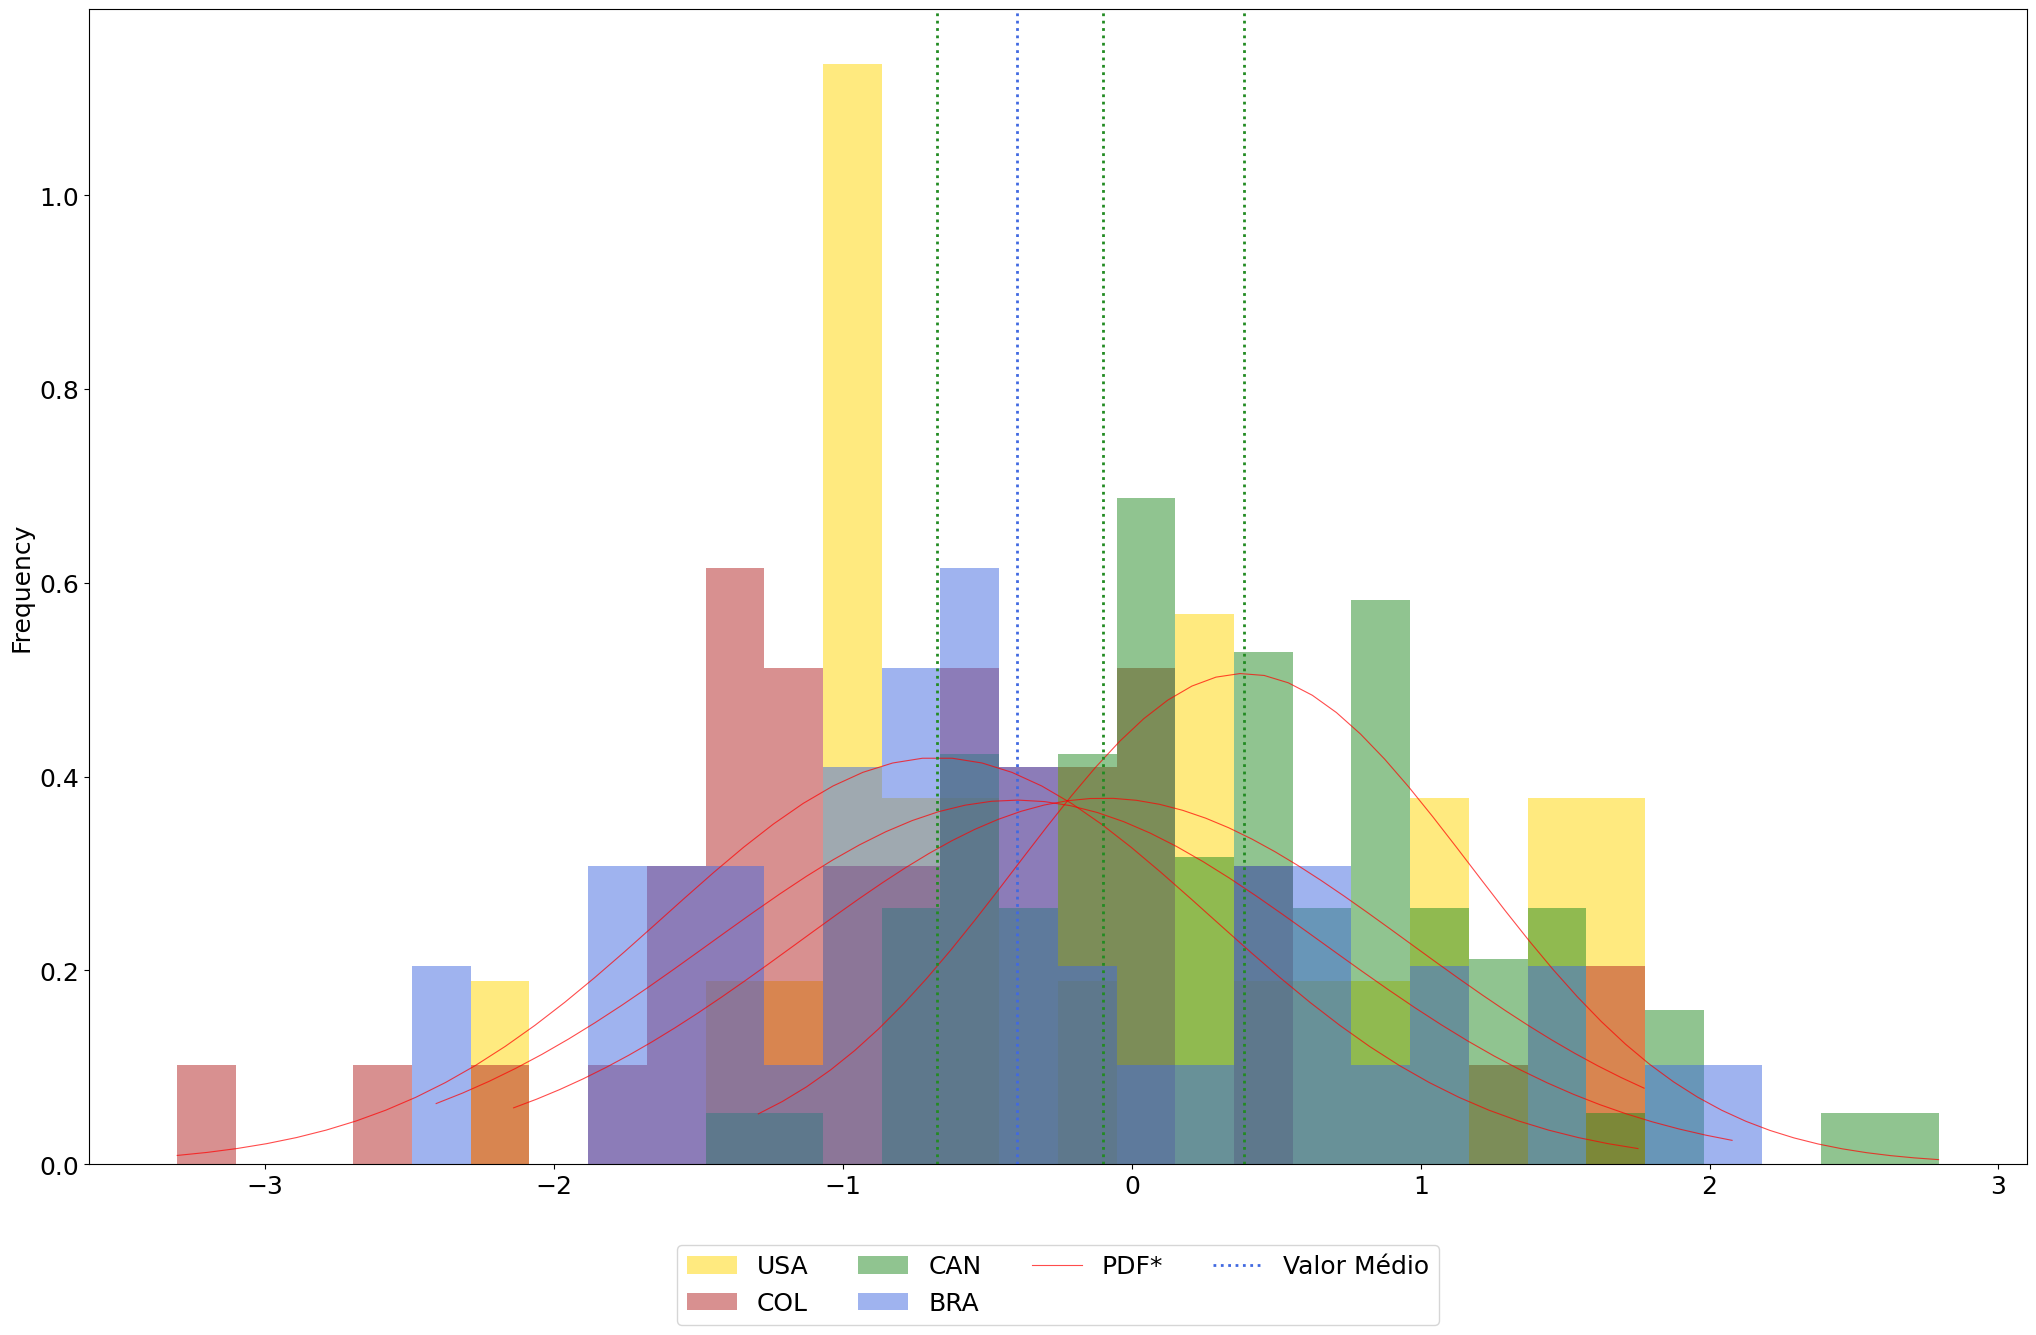

In [30]:
num_skills = 4
ttl = ['θ' + str(i+1) for i in range(num_skills)]
colors = ['royalblue', 'forestgreen', 'firebrick', 'gold']
leg = ['BRA', 'CAN', 'COL', 'USA'] 
plt.figure(figsize=(25, 15))
#axs = axs.ravel()

bra10 = df_10_all[df_10_all['CNT'] == 'Brazil'].iloc[:, 2]
can10 = df_10_all[df_10_all['CNT'] == 'Canada'].iloc[:, 2]
col10 = df_10_all[df_10_all['CNT'] == 'Colombia'].iloc[:, 2]
usa10 = df_10_all[df_10_all['CNT'] == 'United States'].iloc[:, 2]

bra10 = np.random.normal(bra10.mean(), bra10.std(), bra10.shape[0])
can10 = np.random.normal(can10.mean(), can10.std(), can10.shape[0])
col10 = np.random.normal(col10.mean(), col10.std(), col10.shape[0])
usa10 = np.random.normal(usa10.mean(), usa10.std(), usa10.shape[0])

#q25, q75 = np.percentile(can10, [25, 75])
#bin_width = 2 * (q75 - q25) * can10.shape[0] ** (-1/3)
#bins = round((can10.max() - can10.min()) / bin_width)
bins = 30

plt.hist((bra10, can10, col10, usa10), bins=bins, histtype='stepfilled', density=True, alpha=0.5, color=colors, label=leg)
    
# 10%
xRange = np.linspace(np.min(bra10), np.max(bra10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, bra10.mean(), bra10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8, label="PDF*")
plt.axvline(bra10.mean(), color=colors[0], linestyle = ':',linewidth=2, label="Valor Médio")

xRange = np.linspace(np.min(can10), np.max(can10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, can10.mean(), can10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(can10.mean(), color=colors[1], linestyle = ':',linewidth=2)

xRange = np.linspace(np.min(col10), np.max(col10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, col10.mean(), col10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(col10.mean(), color=colors[1], linestyle = ':',linewidth=2)

xRange = np.linspace(np.min(usa10), np.max(usa10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, usa10.mean(), usa10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(usa10.mean(), color=colors[1], linestyle = ':',linewidth=2)

plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylabel("Frequency", fontsize=18) 
plt.legend(loc='lower center', fontsize=18, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.xlabel("", fontsize=8, labelpad=3)
plt.subplots_adjust(hspace=0.7)
plt.show()

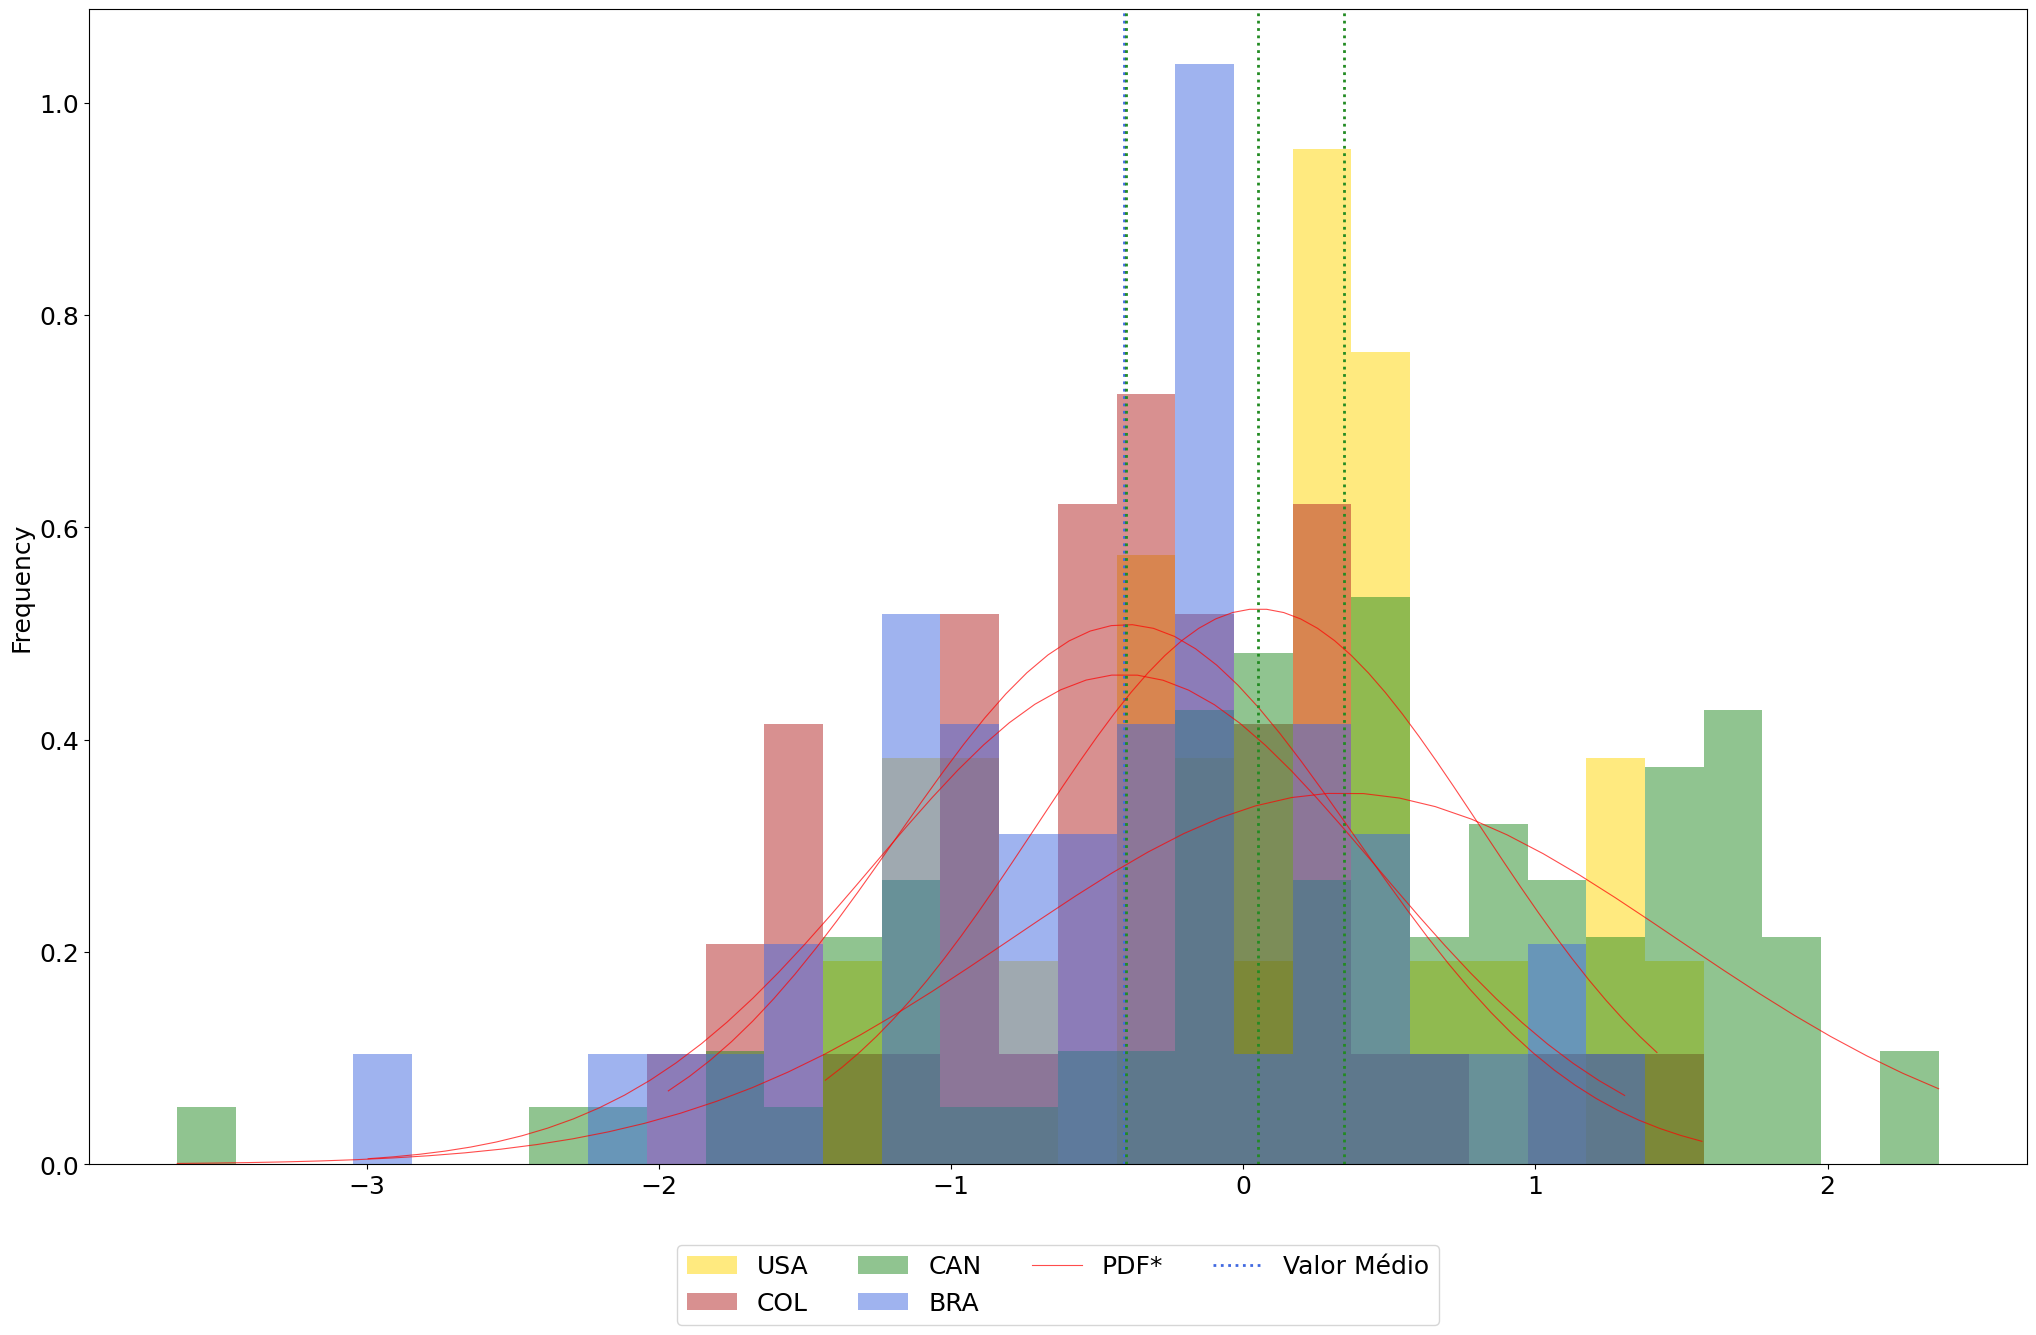

In [31]:
num_skills = 4
ttl = ['θ' + str(i+1) for i in range(num_skills)]
colors = ['royalblue', 'forestgreen', 'firebrick', 'gold']
leg = ['BRA', 'CAN', 'COL', 'USA'] 
plt.figure(figsize=(25, 15))
#axs = axs.ravel()

bra10 = df_10_all[df_10_all['CNT'] == 'Brazil'].iloc[:, 3]
can10 = df_10_all[df_10_all['CNT'] == 'Canada'].iloc[:, 3]
col10 = df_10_all[df_10_all['CNT'] == 'Colombia'].iloc[:, 3]
usa10 = df_10_all[df_10_all['CNT'] == 'United States'].iloc[:, 3]

bra10 = np.random.normal(bra10.mean(), bra10.std(), bra10.shape[0])
can10 = np.random.normal(can10.mean(), can10.std(), can10.shape[0])
col10 = np.random.normal(col10.mean(), col10.std(), col10.shape[0])
usa10 = np.random.normal(usa10.mean(), usa10.std(), usa10.shape[0])

#q25, q75 = np.percentile(can10, [25, 75])
#bin_width = 2 * (q75 - q25) * can10.shape[0] ** (-1/3)
#bins = round((can10.max() - can10.min()) / bin_width)
bins = 30

plt.hist((bra10, can10, col10, usa10), bins=bins, histtype='stepfilled', density=True, alpha=0.5, color=colors, label=leg)
    
# 10%
xRange = np.linspace(np.min(bra10), np.max(bra10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, bra10.mean(), bra10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8, label="PDF*")
plt.axvline(bra10.mean(), color=colors[0], linestyle = ':',linewidth=2, label="Valor Médio")

xRange = np.linspace(np.min(can10), np.max(can10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, can10.mean(), can10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(can10.mean(), color=colors[1], linestyle = ':',linewidth=2)

xRange = np.linspace(np.min(col10), np.max(col10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, col10.mean(), col10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(col10.mean(), color=colors[1], linestyle = ':',linewidth=2)

xRange = np.linspace(np.min(usa10), np.max(usa10))#, len(cs))
nd = sc.stats.norm.pdf(xRange, usa10.mean(), usa10.std())
plt.plot(xRange, nd, color='r', alpha=0.70, linewidth=0.8)
plt.axvline(usa10.mean(), color=colors[1], linestyle = ':',linewidth=2)

plt.tick_params(axis='both', which='major', labelsize=18)
plt.ylabel("Frequency", fontsize=18) 
plt.legend(loc='lower center', fontsize=18, bbox_to_anchor=(0.5, -0.15), ncol=4)
plt.xlabel("", fontsize=8, labelpad=3)
plt.subplots_adjust(hspace=0.7)
plt.show()

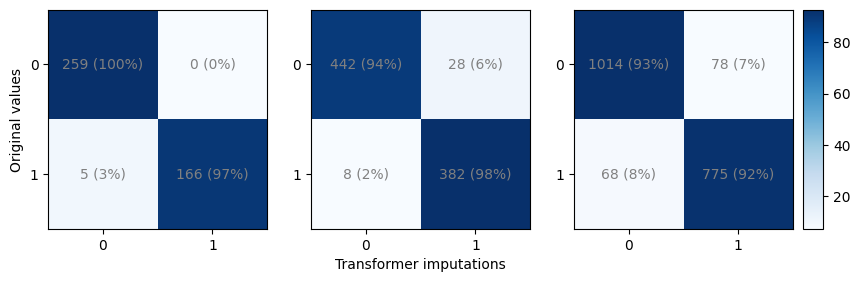

In [99]:
missing = ['10', '25', '50']

fig, axs = plt.subplots(1, 3, figsize=(10, 18))


for m in range(len(missing)):

    original = pd.read_csv('../input_data/test.csv', sep=';', header=None)
    transformer = pd.read_csv('output_data/' + missing[m] + '_missing/y/ypred_transformer_' + missing[m] + '_missing_ALL_CNTS.csv', sep=';', header=None)
    masked = pd.read_csv('output_data/' + missing[m] + '_missing/masked/masked_pred_' + missing[m] + '_missing_ALL_CNTS.csv', sep=';', header=None)

    #original = original.values.reshape((int(items[0]), 10000)).transpose()

    trn = np.ones_like(transformer.values)
    trn[transformer.values < 0.5] = 0
    #print(trn)

    masked_indices = []

    for x in range(masked.shape[0]):
        b = []
        for y in range(masked.shape[1]):
            if masked.values[x,y] == -1:
                b.append(y)
        masked_indices.append(b)

    masked_indices = np.array(masked_indices)

    mo = np.ndarray(masked_indices.shape)
    mt = np.ndarray(masked_indices.shape)

    for x in range(masked_indices.shape[0]):
        mo[x] = original.values[x, :][masked_indices[x,:]]
        mt[x] = trn[x, :][masked_indices[x,:]]

    data = {'masked original': mo.flatten(), 'masked transformer': mt.flatten()}

    df = pd.DataFrame(data)

    cmv = pd.crosstab(df['masked original'], df['masked transformer'])
    cmp = pd.crosstab(df['masked original'], df['masked transformer']).apply(lambda s: (s/s.sum() * 100), axis=1)

    norm = Normalize(vmin = np.min(cmp.values.flatten()), vmax = np.max(cmp.values.flatten()))
    cmap = cm.Blues

    im = axs[m].imshow(cmp, norm=norm, cmap = cmap)

    #if m == 2:
    #    divider = make_axes_locatable(axs[m])
    #    cax = divider.append_axes("right", size="15%", pad=0.1)
    #    cbar = fig.colorbar(im, cax=cax)
        
    axs[m].set_yticks([0, 1])
    axs[m].set_xticks([0, 1])

    for x in range(cmp.shape[0]):
        for y in range(cmp.shape[1]):
            text = im.axes.text(y, x, str(cmv.values[x, y]) + ' ('+ str(round(cmp.values[x, y])) + '%)', ha="center", va="center", color="gray")

axs[0].set_ylabel('Original values')
axs[1].set_xlabel('Transformer imputations')    

plt.subplots_adjust(right = 0.87)
cax = fig.add_axes([axs[m].get_position().x1+0.01,axs[m].get_position().y0,0.02,axs[m].get_position().height])
plt.colorbar(im, cax=cax)
plt.show()
        